In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
companies = pd.read_csv("companies.csv", encoding = 'unicode_escape')
companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')
companies['name'] = companies['name'].str.encode('utf-8').str.decode('ascii', 'ignore')
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/Eron,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [3]:
companies = companies.drop('founded_at', axis = 1) 

In [4]:
companies = companies.drop('state_code', axis = 1) 

In [5]:
companies = companies.drop('region', axis = 1)  

In [6]:
companies = companies.drop('city', axis = 1)  

In [7]:
round(100 * (companies.isnull().sum()/len(companies.index)), 2) 

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
dtype: float64

In [8]:
companies = companies.drop('homepage_url', axis = 1) 

In [9]:
companies = companies.dropna(axis=0, subset=['category_list']) 

In [10]:
companies = companies.dropna(axis=0, subset=['country_code']) 

In [11]:
companies

,permalink,name,category_list,status,country_code
0,/Organization/-Fame,#fame,Media,operating,IND
1,/Organization/-Qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/Organization/0-6-Com,0-6.com,Curated Web,operating,CHN
4,/Organization/004-Technologies,004 Technologies,Software,operating,USA
5,/Organization/01Games-Technology,01Games Technology,Games,operating,HKG
...,...,...,...,...,...
66361,/Organization/Zytoprotec,Zytoprotec,Biotechnology,operating,AUT
66362,/Organization/Zzish,Zzish,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,Enterprise Software,operating,CHN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV


In [12]:
companies = companies.query('status != ["closed"]') 

In [13]:
companies = companies.reset_index(drop=True) 
companies

,permalink,name,category_list,status,country_code
0,/Organization/-Fame,#fame,Media,operating,IND
1,/Organization/-Qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/Organization/0-6-Com,0-6.com,Curated Web,operating,CHN
3,/Organization/004-Technologies,004 Technologies,Software,operating,USA
4,/Organization/01Games-Technology,01Games Technology,Games,operating,HKG
...,...,...,...,...,...
53515,/Organization/Zytoprotec,Zytoprotec,Biotechnology,operating,AUT
53516,/Organization/Zzish,Zzish,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR
53517,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,Enterprise Software,operating,CHN
53518,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV


In [14]:
count_c_permalink = companies['permalink'].value_counts()
count_c_permalink

/Organization/Agendize                                                1
/Organization/Second-Wind                                             1
/Organization/Genius-Digital                                          1
/Organization/Metamason                                               1
/Organization/Tradeslide                                              1
                                                                     ..
/Organization/Anhelo                                                  1
/Organization/Epoise                                                  1
/Organization/Phoodeez                                                1
/Organization/Takeaway-Com                                            1
/Organization/Tubing-Operations-For-Humanitarian-Logistics-T-O-H-L    1
Name: permalink, Length: 53520, dtype: int64

In [15]:
companies['permalink'] = companies['permalink'].str.lower()
companies 

,permalink,name,category_list,status,country_code
0,/organization/-fame,#fame,Media,operating,IND
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
3,/organization/004-technologies,004 Technologies,Software,operating,USA
4,/organization/01games-technology,01Games Technology,Games,operating,HKG
...,...,...,...,...,...
53515,/organization/zytoprotec,Zytoprotec,Biotechnology,operating,AUT
53516,/organization/zzish,Zzish,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR
53517,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,Enterprise Software,operating,CHN
53518,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV


In [16]:
companies = companies.rename(columns = {'permalink': 'company_permalink'}, inplace = False) 
companies

,company_permalink,name,category_list,status,country_code
0,/organization/-fame,#fame,Media,operating,IND
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
3,/organization/004-technologies,004 Technologies,Software,operating,USA
4,/organization/01games-technology,01Games Technology,Games,operating,HKG
...,...,...,...,...,...
53515,/organization/zytoprotec,Zytoprotec,Biotechnology,operating,AUT
53516,/organization/zzish,Zzish,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR
53517,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,Enterprise Software,operating,CHN
53518,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV


In [17]:
rounds2 = pd.read_csv("rounds2.csv", encoding = 'unicode_escape')
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2['funding_round_permalink'] = rounds2['funding_round_permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [18]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2  

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [19]:
rounds2 = rounds2.drop('funding_round_permalink', axis = 1) 

In [20]:
rounds2 = rounds2.drop('funding_round_code', axis = 1) 

In [21]:
rounds2 = rounds2.drop('funded_at', axis = 1) 

In [22]:
rounds2 

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/organization/-qounter,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/organization/-the-one-of-them-inc-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0
...,...,...,...
114944,/organization/zzzzapp-com,convertible_note,41313.0
114945,/organization/zzzzapp-com,seed,32842.0
114946,/organization/eron,venture,NaN
114947,/organization/asys-2,seed,18192.0


In [23]:
rounds2 = rounds2.query('funding_round_type != ["convertible_note"]')

In [24]:
rounds2 = rounds2.query('funding_round_type != ["debt_financing"]')

In [25]:
rounds2 = rounds2.query('funding_round_type != ["equity_crowdfunding"]')

In [26]:
rounds2 = rounds2.query('funding_round_type != ["grant"]') 

In [27]:
rounds2 = rounds2.query('funding_round_type != ["non_equity_assistance"]') 

In [28]:
rounds2 = rounds2.query('funding_round_type != ["post_ipo_debt"]')

In [29]:
rounds2 = rounds2.query('funding_round_type != ["post_ipo_equity"]') 

In [30]:
rounds2 = rounds2.query('funding_round_type != ["product_crowdfunding"]') 

In [31]:
rounds2 = rounds2.query('funding_round_type != ["secondary_market"]') 

In [32]:
rounds2 = rounds2.query('funding_round_type != ["undisclosed"]') 

In [33]:
rounds2

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/organization/-qounter,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/organization/-the-one-of-them-inc-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0
...,...,...,...
114942,/organization/zzzzapp-com,seed,7000.0
114943,/organization/zzzzapp-com,seed,33149.0
114945,/organization/zzzzapp-com,seed,32842.0
114946,/organization/eron,venture,NaN


In [34]:
rounds2 = rounds2.reset_index(drop=True) 

In [35]:
rounds2

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/organization/-qounter,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/organization/-the-one-of-them-inc-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0
...,...,...,...
94392,/organization/zzzzapp-com,seed,7000.0
94393,/organization/zzzzapp-com,seed,33149.0
94394,/organization/zzzzapp-com,seed,32842.0
94395,/organization/eron,venture,NaN


In [36]:
rounds2['company_permalink'].isin(companies['company_permalink']).value_counts() 

True     80250
False    14147
Name: company_permalink, dtype: int64

In [37]:
companies['company_permalink'].isin(rounds2['company_permalink']).value_counts() 

True     45660
False     7860
Name: company_permalink, dtype: int64

In [38]:
master_frame = pd.merge(companies, rounds2, on = 'company_permalink', how = 'inner') 
master_frame

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,700000.0
3,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,venture,2000000.0
4,/organization/004-technologies,004 Technologies,Software,operating,USA,venture,NaN
...,...,...,...,...,...,...,...
80245,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,Enterprise Software,operating,CHN,venture,1587301.0
80246,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,seed,7000.0
80247,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,seed,33149.0
80248,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,seed,32842.0


In [39]:
mf1 = master_frame.query('country_code == ["AFG"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [40]:
mf1 = master_frame.query('country_code == ["ALB"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
3672,/organization/american-albanian-hemp-company,American-Albanian Hemp Company,Agriculture|Health and Wellness|Pharmaceuticals,operating,ALB,seed,NaN
6979,/organization/baboon,Baboon,Consumers|Delivery|Hospitality,operating,ALB,seed,133624.0
6980,/organization/baboon,Baboon,Consumers|Delivery|Hospitality,operating,ALB,seed,143120.0


In [41]:
master_frame = master_frame.query('country_code != ["ALB"]')

In [42]:
mf1 = master_frame.query('country_code == ["DZA"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
36765,/organization/kick-sport,Kick Sport,E-Commerce,operating,DZA,seed,378812.0


In [43]:
master_frame = master_frame.query('country_code != ["DZA"]') 

In [44]:
mf1 = master_frame.query('country_code == ["AND"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [45]:
mf1 = master_frame.query('country_code == ["AGO"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [46]:
mf1 = master_frame.query('country_code == ["ATA"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [47]:
mf1 = master_frame.query('country_code == ["ARG"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
951,/organization/acamica,Acamica,EdTech|Education|Entrepreneur|Technology,operating,ARG,seed,51568.0
2301,/organization/afluenta,Afluenta,Consumer Lending|Finance|FinTech|Peer-to-Peer,operating,ARG,venture,2000000.0
2302,/organization/afluenta,Afluenta,Consumer Lending|Finance|FinTech|Peer-to-Peer,operating,ARG,angel,775000.0
2303,/organization/afluenta,Afluenta,Consumer Lending|Finance|FinTech|Peer-to-Peer,operating,ARG,venture,NaN
2801,/organization/aivo,Aivo,Artificial Intelligence|Chat|Customer Service|...,operating,ARG,seed,350000.0
...,...,...,...,...,...,...,...
79920,/organization/zolvers,Zolvers,Marketplaces|Services,operating,ARG,seed,53000.0
79921,/organization/zolvers,Zolvers,Marketplaces|Services,operating,ARG,seed,500000.0
79922,/organization/zolvers,Zolvers,Marketplaces|Services,operating,ARG,seed,0.0
80141,/organization/zupcat,ZupCat,Games|Mobile,operating,ARG,venture,700000.0


In [48]:
master_frame = master_frame.query('country_code != ["ARG"]') 

In [49]:
mf1 = master_frame.query('country_code == ["ARM"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
7480,/organization/be2,be2,Curated Web|Match-Making|Online Dating,operating,ARM,venture,7730000.0
7481,/organization/be2,be2,Curated Web|Match-Making|Online Dating,operating,ARM,venture,18787500.0
27724,/organization/ggtaxi,ggTaxi,Services|Software|Taxis|Transportation,operating,ARM,seed,200000.0
63207,/organization/skycryptor,Skycryptor,Cloud Security|Data Security|Service Providers,operating,ARM,seed,100000.0


In [50]:
master_frame = master_frame.query('country_code != ["ARM"]') 

In [51]:
mf1 = master_frame.query('country_code == ["ABW"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [52]:
mf1 = master_frame.query('country_code == ["AUT"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
64,/organization/123people,yelster digital gmbh (former 123people),Local Search|Software|Web Design,acquired,AUT,seed,NaN
1886,/organization/adspired-technologies,Adspired Technologies,Analytics|E-Commerce|Software|Technology,operating,AUT,seed,NaN
2282,/organization/affiris,AFFiRiS,Biotechnology,operating,AUT,venture,34082500.0
2599,/organization/aim-software,Aim Software,Software,operating,AUT,venture,NaN
3872,/organization/ams-ag,ams AG,Semiconductors,ipo,AUT,private_equity,149938635.0
...,...,...,...,...,...,...,...
78578,/organization/yasssu,YASSSU,Android|Digital Media|iPhone|Media|Mobile|Mobi...,operating,AUT,angel,695850.0
78579,/organization/yasssu,YASSSU,Android|Digital Media|iPhone|Media|Mobile|Mobi...,operating,AUT,angel,644215.0
79867,/organization/zizooboats-gmbh,Zizoo,Boating Industry|Marketplaces|Sailing Communit...,operating,AUT,seed,853578.0
79995,/organization/zoomsquare,zoomsquare,Real Estate,operating,AUT,angel,612533.0


In [53]:
master_frame = master_frame.query('country_code != ["AUT"]') 

In [54]:
mf1 = master_frame.query('country_code == ["AZE"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
41007,/organization/manads-llc,Manads LLC,Ad Targeting|Advertising|Advertising Platforms...,operating,AZE,seed,100000.0
64198,/organization/socset,Socset.,Analytics|Meeting Software|Social Media,operating,AZE,seed,10000.0
75299,/organization/vital-llc,Vital LLC,Career Management|Document Management|Recruiting,operating,AZE,seed,200000.0


In [55]:
master_frame = master_frame.query('country_code != ["AZE"]') 

In [56]:
mf1 = master_frame.query('country_code == ["BLR"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
32109,/organization/idiscount-ltd,iDiscount Ltd,Advertising|Apps|Electronics,operating,BLR,seed,20000.0
49348,/organization/ontourcloud,Ontourcloud - touring app,Travel & Tourism,operating,BLR,seed,20000.0
54385,/organization/press-about-us,Press About Us,News,operating,BLR,seed,20000.0
54701,/organization/pro-stream,Pro Stream +,Curated Web|Design|Internet|Outsourcing|Web Tools,operating,BLR,seed,10000.0


In [57]:
master_frame = master_frame.query('country_code != ["BLR"]') 

In [58]:
mf1 = master_frame.query('country_code == ["BEL"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
132,/organization/2-observe,2-Observe,Design|Health and Wellness|Health Care|Hospita...,operating,BEL,seed,204189.0
205,/organization/2houses,2houses,Curated Web,operating,BEL,seed,106626.0
206,/organization/2houses,2houses,Curated Web,operating,BEL,venture,860102.0
864,/organization/ablynx,Ablynx,Biotechnology,ipo,BEL,venture,4898950.0
865,/organization/ablynx,Ablynx,Biotechnology,ipo,BEL,venture,50000000.0
...,...,...,...,...,...,...,...
78378,/organization/xpenditure,Xpenditure,Business Productivity|SaaS|Software,operating,BEL,seed,2555765.0
78840,/organization/yondr-2,YONDR,Media,operating,BEL,venture,0.0
78896,/organization/you-know-watt,You Know Watt,Analytics|Big Data|Consumers,operating,BEL,seed,18600.0
78897,/organization/you-know-watt,You Know Watt,Analytics|Big Data|Consumers,operating,BEL,seed,1450000.0


In [59]:
master_frame = master_frame.query('country_code != ["BEL"]') 

In [60]:
mf1 = master_frame.query('country_code == ["BEN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [61]:
mf1 = master_frame.query('country_code == ["BTN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [62]:
mf1 = master_frame.query('country_code == ["BOL"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [63]:
mf1 = master_frame.query('country_code == ["BES"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [64]:
mf1 = master_frame.query('country_code == ["BIH"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [65]:
mf1 = master_frame.query('country_code == ["BVT"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [66]:
mf1 = master_frame.query('country_code == ["BRA"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
276,/organization/3c-plus,3C Plus,Cloud Computing|Communications Hardware|Contac...,operating,BRA,seed,75000.0
676,/organization/99jobs,99jobs,Big Data|Big Data Analytics|Enterprise Softwar...,operating,BRA,seed,NaN
677,/organization/99motos,99motos,Apps|Logistics|Postal and Courier Services,operating,BRA,seed,442943.0
680,/organization/99taxis,99Taxis,Android|iOS|Mobile|Mobile Payments|SaaS|Taxis,operating,BRA,venture,25000000.0
681,/organization/99taxis,99Taxis,Android|iOS|Mobile|Mobile Payments|SaaS|Taxis,operating,BRA,seed,NaN
...,...,...,...,...,...,...,...
79563,/organization/zeropaper,ZeroPaper S/A,Finance|Financial Services|Small and Medium Bu...,acquired,BRA,angel,200000.0
79564,/organization/zeropaper,ZeroPaper S/A,Finance|Financial Services|Small and Medium Bu...,acquired,BRA,seed,NaN
80131,/organization/zumpsites,Zumpsites,Development Platforms|E-Commerce|E-Commerce Pl...,operating,BRA,angel,2000.0
80140,/organization/zup-it-innovation,Zup IT Innovation,Innovation Management|Project Management|Services,operating,BRA,venture,NaN


In [67]:
master_frame = master_frame.query('country_code != ["BRA"]') 

In [68]:
mf1 = master_frame.query('country_code == ["BGR"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
309,/organization/3dc,3DC,Technology,acquired,BGR,venture,NaN
4912,/organization/appzio---engaging-experiences,Appzio - Engaging Experiences,Apps|Computers|Software,operating,BGR,seed,54857.0
5519,/organization/artery,ARTery,Application Platforms|Customer Service|Software,operating,BGR,seed,30320.0
5520,/organization/artery,ARTery,Application Platforms|Customer Service|Software,operating,BGR,seed,54857.0
5526,/organization/arthesis-covers,Arthesis Covers,Artificial Intelligence|Fashion|Services,operating,BGR,seed,67022.0
...,...,...,...,...,...,...,...
77600,/organization/wonderswamp,Wonderswamp,Games,operating,BGR,seed,32352.0
78523,/organization/yanado,Yanado,Productivity Software|Project Management,operating,BGR,seed,34172.0
78524,/organization/yanado,Yanado,Productivity Software|Project Management,operating,BGR,seed,34395.0
78594,/organization/yatrus-analytics,Yatrus Analytics,Consulting|Financial Services|Media,operating,BGR,angel,100000.0


In [69]:
master_frame = master_frame.query('country_code != ["BGR"]') 

In [70]:
mf1 = master_frame.query('country_code == ["BFA"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [71]:
mf1 = master_frame.query('country_code == ["CPV"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [72]:
mf1 = master_frame.query('country_code == ["CAF"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [73]:
mf1 = master_frame.query('country_code == ["TCD"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [74]:
mf1 = master_frame.query('country_code == ["CHL"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
13,/organization/1-2-3-listo,"1,2,3 Listo",E-Commerce,operating,CHL,seed,40000.0
1719,/organization/adiktivo,ADIKTIVO,Fashion,operating,CHL,seed,40000.0
1776,/organization/admetricks,admetricks,Advertising,operating,CHL,seed,50000.0
1777,/organization/admetricks,admetricks,Advertising,operating,CHL,seed,425000.0
1778,/organization/admetricks,admetricks,Advertising,operating,CHL,seed,40000.0
...,...,...,...,...,...,...,...
78627,/organization/yebame-spa,Yebame SpA,Transportation,operating,CHL,venture,25000.0
78784,/organization/ynnovable-design,Ynnovable Design,Design,operating,CHL,seed,40000.0
78870,/organization/yoozon,Yoozon,Cloud Computing|File Sharing|Web Hosting,operating,CHL,seed,40000.0
79083,/organization/yumit,Yumit,File Sharing|Restaurants|Social Media,operating,CHL,seed,71365.0


In [75]:
master_frame = master_frame.query('country_code != ["CHL"]') 

In [76]:
mf1 = master_frame.query('country_code == ["CHN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
3,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,venture,2000000.0
34,/organization/1006-tv,1006.tv,Games|Media,operating,CHN,angel,NaN
35,/organization/1006-tv,1006.tv,Games|Media,operating,CHN,venture,10000000.0
36,/organization/1006-tv,1006.tv,Games|Media,operating,CHN,venture,NaN
37,/organization/100du-tv,100du.tv,Hospitality,operating,CHN,venture,NaN
...,...,...,...,...,...,...,...
79937,/organization/zonbo-media,Zonbo Media,News,operating,CHN,venture,NaN
79938,/organization/zonbo-media,Zonbo Media,News,operating,CHN,venture,NaN
80152,/organization/zurn-international-e-commerce-co...,Zurn,Social Media,operating,CHN,angel,NaN
80162,/organization/zuzuche,ZuzuChe,E-Commerce,operating,CHN,venture,1515151.0


In [77]:
master_frame = master_frame.query('country_code != ["CHN"]') 

In [78]:
mf1 = master_frame.query('country_code == ["COL"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
1278,/organization/acsendo,Acsendo,Enterprise Software,operating,COL,angel,150000.0
5665,/organization/asegurate-facil,Asegurate Facil,Automotive|Insurance|Insurance Companies,operating,COL,seed,500000.0
9656,/organization/boda-group,Boda Group,Event Management|Photography|Services|Weddings,operating,COL,venture,381680.0
10235,/organization/brainz-games,Brainz Games,Games|Graphics,operating,COL,angel,200000.0
10236,/organization/brainz-games,Brainz Games,Games|Graphics,operating,COL,venture,1300000.0
...,...,...,...,...,...,...,...
75569,/organization/voice123,Voice123,Advertising|Audio,acquired,COL,seed,NaN
75725,/organization/vosavos,Vosavos,Child Care|Recruiting|Services,operating,COL,seed,290989.0
77265,/organization/winad,WinAd,Information Technology,operating,COL,seed,25000.0
78766,/organization/yimup,Yimup,Art|Artists Globally|Entertainment Industry,operating,COL,venture,34644.0


In [79]:
master_frame = master_frame.query('country_code != ["COL"]') 

In [80]:
mf1 = master_frame.query('country_code == ["COM"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [81]:
mf1 = master_frame.query('country_code == ["COD"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [82]:
mf1 = master_frame.query('country_code == ["COG"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [83]:
mf1 = master_frame.query('country_code == ["CRI"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
796,/organization/abcdexperts,abcdexperts,B2B|Marketplaces|Services|Social Media,operating,CRI,seed,147000.0
8249,/organization/bigbox,Bigbox,E-Commerce|Retail,operating,CRI,seed,480000.0
22017,/organization/emporiocompras,EmporioCompras,Internet,operating,CRI,venture,NaN
47563,/organization/nivela,Nivela,Credit|Telecommunications|Utilities,operating,CRI,seed,40000.0
69581,/organization/the-other-guys,The Other Guys,Games|Mobile Games|Social Games,operating,CRI,seed,425000.0
73128,/organization/upe-places,UPE Places,Travel & Tourism,operating,CRI,seed,40000.0


In [84]:
master_frame = master_frame.query('country_code != ["CRI"]')  

In [85]:
mf1 = master_frame.query('country_code == ["HRV"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
3976,/organization/anctu,Anctu,Enterprise Software|Social Media Marketing|Sof...,operating,HRV,seed,30000.0
13780,/organization/cinexio,Cinexio,Games,operating,HRV,seed,52324.0
13781,/organization/cinexio,Cinexio,Games,operating,HRV,seed,130000.0
18827,/organization/degordian,Degordian,Advertising|Performance Marketing|Social Media,operating,HRV,venture,1302569.0
28479,/organization/gohome,GoHome,Property Management|Real Estate|Search,operating,HRV,venture,1331100.0
49817,/organization/oradian,Oradian,Banking|Enterprises|SaaS|Software,operating,HRV,seed,NaN
49818,/organization/oradian,Oradian,Banking|Enterprises|SaaS|Software,operating,HRV,seed,NaN
65591,/organization/spotie,Spotie,Travel|Travel & Tourism|Vacation Rentals,acquired,HRV,angel,20000.0
80246,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,seed,7000.0
80247,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,seed,33149.0


In [86]:
master_frame = master_frame.query('country_code != ["HRV"]') 

In [87]:
mf1 = master_frame.query('country_code == ["CUB"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [88]:
mf1 = master_frame.query('country_code == ["CZE"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
247,/organization/360cities,360Cities,Curated Web|Maps|Photography|Virtual Worlds,operating,CZE,angel,NaN
1681,/organization/adfinance,AdFinance,Advertising|Lead Generation,operating,CZE,seed,NaN
5695,/organization/askyou,AskYou,Curated Web|Entertainment|Events|Private Socia...,operating,CZE,seed,7500.0
6479,/organization/avast,AVAST Software,Security,operating,CZE,private_equity,NaN
6480,/organization/avast,AVAST Software,Security,operating,CZE,private_equity,100000000.0
...,...,...,...,...,...,...,...
75240,/organization/visual-unity,Visual Unity,Broadcasting,operating,CZE,venture,7200000.0
76436,/organization/wear-my-tags,Wear My Tags,Crowdsourcing|Fashion|Manufacturing|Mobile,operating,CZE,seed,35000.0
76437,/organization/wear-my-tags,Wear My Tags,Crowdsourcing|Fashion|Manufacturing|Mobile,operating,CZE,seed,100000.0
77941,/organization/wujigrid,WujiGrid,Software,operating,CZE,seed,33887.0


In [89]:
master_frame = master_frame.query('country_code != ["CZE"]') 

In [90]:
mf1 = master_frame.query('country_code == ["CIV"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
65497,/organization/sportif225,sportif225,Sports,operating,CIV,seed,60000.0
67503,/organization/sycelim,Sycelim,Software,operating,CIV,seed,60000.0


In [91]:
master_frame = master_frame.query('country_code != ["CIV"]') 

In [92]:
mf1 = master_frame.query('country_code == ["DNK"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
102,/organization/1calendar,1calendar,Advertising|Education|Internet|Mobile,operating,DNK,angel,40000.0
952,/organization/acarix,Acarix,Health Care,operating,DNK,seed,4710960.0
1226,/organization/acon,aCon,Hardware + Software,operating,DNK,venture,398000.0
1227,/organization/acon,aCon,Hardware + Software,operating,DNK,venture,1050000.0
1228,/organization/acon,aCon,Hardware + Software,operating,DNK,venture,550000.0
...,...,...,...,...,...,...,...
78913,/organization/youcalc,youcalc,Analytics|Business Intelligence|Gadget|Graphic...,acquired,DNK,seed,440000.0
79591,/organization/zerved,zerved,Mobile,operating,DNK,angel,61504.0
79986,/organization/zoomio-holding,Zoomio Holding,Software,acquired,DNK,venture,7130000.0
80177,/organization/zyb,ZYB,Mobile|Networking|Social Network Media,acquired,DNK,venture,3845100.0


In [93]:
master_frame = master_frame.query('country_code != ["DNK"]') 

In [94]:
mf1 = master_frame.query('country_code == ["DJI"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [95]:
mf1 = master_frame.query('country_code == ["DOM"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
36436,/organization/karmagy,Karmagy,Gamification|Internet|Social Media,operating,DOM,seed,250000.0
45356,/organization/myclasses,MyClasses,All Students|Charter Schools|Classifieds|CRM|E...,operating,DOM,angel,38598.0


In [96]:
master_frame = master_frame.query('country_code != ["DOM"]') 

In [97]:
mf1 = master_frame.query('country_code == ["ECU"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
13777,/organization/cinepass,CinePass,Advertising|Entertainment|Film,operating,ECU,seed,30000.0
13778,/organization/cinepass,CinePass,Advertising|Entertainment|Film,operating,ECU,seed,45000.0
13960,/organization/city-bebe,City BeBe,Baby Accessories|Online Shopping|Parenting,operating,ECU,venture,915000.0
16745,/organization/couchy-com,Couchy.com,Social Media,operating,ECU,seed,40000.0
16746,/organization/couchy-com,Couchy.com,Social Media,operating,ECU,venture,50850.0
27980,/organization/gkill-city,GkillCity,Audio|Content|Digital Media,operating,ECU,seed,75000.0
52066,/organization/personaling,Personaling,E-Commerce|Fashion|Retail,operating,ECU,seed,95389.0
58393,/organization/revokom,Revokom,Information Technology,operating,ECU,seed,40000.0
58394,/organization/revokom,Revokom,Information Technology,operating,ECU,seed,NaN
58400,/organization/revolucionatuprecio-com,RevolucionaTuPrecio.com,Design|E-Commerce|Electronics|Retail,operating,ECU,seed,50000.0


In [98]:
master_frame = master_frame.query('country_code != ["ECU"]') 

In [99]:
mf1 = master_frame.query('country_code == ["EGY"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
2908,/organization/al3abmizo,Al3abMizo,Console Gaming|Entertainment|Game|Games|Online...,operating,EGY,seed,22000.0
2909,/organization/al3abmizo,Al3abMizo,Console Gaming|Entertainment|Game|Games|Online...,operating,EGY,angel,2000.0
2925,/organization/alauna-com,alauna.com,Auctions|E-Commerce|Internet|Shopping,operating,EGY,angel,55000.0
5055,/organization/arabhardware,ArabHardware,Computers|Consumer Electronics|E-Commerce|Elec...,operating,EGY,seed,145000.0
7343,/organization/basharsoft,BasharSoft,Information Technology,operating,EGY,venture,1700000.0
7788,/organization/beliaa,Beliaa,Apps|Automotive|Cars|Innovation Management|Mec...,operating,EGY,seed,10198.0
9004,/organization/bkam,Bkam,Curated Web|Price Comparison,operating,EGY,angel,NaN
9005,/organization/bkam,Bkam,Curated Web|Price Comparison,operating,EGY,venture,NaN
12080,/organization/careerise,Careerise,Career Management|Employment|Social Media,operating,EGY,seed,NaN
12955,/organization/cequens,Cequens,Banking|Messaging|Mobile Payments|SMS,operating,EGY,private_equity,53000000.0


In [100]:
master_frame = master_frame.query('country_code != ["EGY"]') 

In [101]:
mf1 = master_frame.query('country_code == ["SLV"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
32980,/organization/inearth,inEarth,Games|Social Games|Technology,operating,SLV,seed,50000.0
56858,/organization/rawbots,Rawbots,Games,operating,SLV,seed,40000.0


In [102]:
master_frame = master_frame.query('country_code != ["SLV"]') 

In [103]:
mf1 = master_frame.query('country_code == ["GNQ"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [104]:
mf1 = master_frame.query('country_code == ["EST"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
4016,/organization/anf-technology,ANF Technology,Nanotechnology,operating,EST,venture,10000000.0
4178,/organization/antelope-surgical-navigation,Antelope Surgical Navigation,Medical,operating,EST,seed,11313.0
7101,/organization/baila-games,Baila Games,Games,operating,EST,seed,12273.0
7281,/organization/barking,Barking,Consumers,operating,EST,seed,131449.0
9749,/organization/bondora,Bondora,Consumer Lending|Finance,operating,EST,seed,57952.0
...,...,...,...,...,...,...,...
77559,/organization/wolfprint-3d,Wolfprint 3D,3D Printing|Kids|Parenting,operating,EST,seed,150000.0
78036,/organization/x3m-games,X3M Games,Games,operating,EST,seed,20395.0
79570,/organization/zeroturnaround,ZeroTurnaround,Software,operating,EST,venture,3000000.0
79571,/organization/zeroturnaround,ZeroTurnaround,Software,operating,EST,venture,5000000.0


In [105]:
master_frame = master_frame.query('country_code != ["EST"]') 

In [106]:
mf1 = master_frame.query('country_code == ["FRO"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [107]:
mf1 = master_frame.query('country_code == ["FIN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
579,/organization/720,720,Analytics|Health and Wellness|Predictive Analy...,operating,FIN,seed,190035.0
761,/organization/aava-mobile,Aava Mobile,Mobile,operating,FIN,venture,4260000.0
1635,/organization/addsearch,AddSearch,Enterprise Search|Search,operating,FIN,seed,650000.0
2800,/organization/aito-technologies,Aito Technologies,Software,operating,FIN,venture,NaN
2888,/organization/akselworks,Akselworks,B2B|Business Development|Business Productivity...,operating,FIN,seed,NaN
...,...,...,...,...,...,...,...
79585,/organization/zervant,Zervant,Billing|Finance|Freelancers|Internet|Sales and...,operating,FIN,seed,1677083.0
79586,/organization/zervant,Zervant,Billing|Finance|Freelancers|Internet|Sales and...,operating,FIN,angel,1626065.0
79587,/organization/zervant,Zervant,Billing|Finance|Freelancers|Internet|Sales and...,operating,FIN,angel,888420.0
79588,/organization/zervant,Zervant,Billing|Finance|Freelancers|Internet|Sales and...,operating,FIN,angel,276675.0


In [108]:
master_frame = master_frame.query('country_code != ["FIN"]') 

In [109]:
mf1 = master_frame.query('country_code == ["FRA"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
28,/organization/1001-menus,ZenChef,Local Businesses|Restaurants,operating,FRA,seed,390000.0
29,/organization/1001-menus,ZenChef,Local Businesses|Restaurants,operating,FRA,venture,6602694.0
30,/organization/1001-menus,ZenChef,Local Businesses|Restaurants,operating,FRA,venture,1736910.0
31,/organization/1001-menus,ZenChef,Local Businesses|Restaurants,operating,FRA,seed,132169.0
32,/organization/1001-menus,ZenChef,Local Businesses|Restaurants,operating,FRA,venture,1800000.0
...,...,...,...,...,...,...,...
79505,/organization/zepass,zePASS,Concerts|E-Commerce|Entertainment|Events|Marke...,operating,FRA,venture,NaN
80186,/organization/zyken-nightcove,Zyken - NightCove,Design|Hardware + Software|Health and Wellness,acquired,FRA,angel,665750.0
80187,/organization/zyken-nightcove,Zyken - NightCove,Design|Hardware + Software|Health and Wellness,acquired,FRA,angel,600000.0
80188,/organization/zyken-nightcove,Zyken - NightCove,Design|Hardware + Software|Health and Wellness,acquired,FRA,seed,340525.0


In [110]:
master_frame = master_frame.query('country_code != ["FRA"]') 

In [111]:
mf1 = master_frame.query('country_code == ["GUF"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [112]:
mf1 = master_frame.query('country_code == ["PYF"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [113]:
mf1 = master_frame.query('country_code == ["ATF"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [114]:
mf1 = master_frame.query('country_code == ["GAB"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [115]:
mf1 = master_frame.query('country_code == ["GEO"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
33238,/organization/inglove,InGlove,Technology|Video Games|Virtual Worlds|Wearables,operating,GEO,seed,30000.0


In [116]:
master_frame = master_frame.query('country_code != ["GEO"]') 

In [117]:
mf1 = master_frame.query('country_code == ["DEU"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
385,/organization/4-animals-alsterscience-gmbh,4 Animals AlsterScience GmbH,Animal Feed|Medical|Specialty Foods,operating,DEU,venture,NaN
444,/organization/4sc,4SC,Human Resources|Recruiting|Social Recruiting,operating,DEU,venture,10511317.0
445,/organization/4scotty-gmbh,4Scotty GmbH,Information Technology|Recruiting|Services,operating,DEU,angel,NaN
453,/organization/4tiitoo,4tiitoo GmbH,3D Technology|Augmented Reality|Computers|Comp...,operating,DEU,seed,NaN
454,/organization/4tiitoo,4tiitoo GmbH,3D Technology|Augmented Reality|Computers|Comp...,operating,DEU,angel,NaN
...,...,...,...,...,...,...,...
79429,/organization/zenguard,ZenMate,Browser Extensions|Privacy|Security|Software,operating,DEU,seed,32165.0
79502,/organization/zeotap,Zeotap,Advertising|Big Data|Mobile,operating,DEU,venture,6400000.0
79503,/organization/zeotap,Zeotap,Advertising|Big Data|Mobile,operating,DEU,seed,1300000.0
79856,/organization/zitra-com,Zitra.com,B2B|E-Commerce|Fashion|Marketplaces|Sales and ...,acquired,DEU,seed,NaN


In [118]:
master_frame = master_frame.query('country_code != ["DEU"]') 

In [119]:
mf1 = master_frame.query('country_code == ["GRC"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
4172,/organization/antcor,AntCor,Software,acquired,GRC,venture,1280000.0
4402,/organization/apirise,Apirise,Developer APIs,operating,GRC,seed,NaN
8409,/organization/bio2chp,BIO2CHP,Energy,operating,GRC,venture,NaN
9482,/organization/blueground,blueground,Hospitality|Leisure|Property Management,operating,GRC,seed,NaN
11793,/organization/captain-wise,Captain Wise,Hotels|Location Based Services|Online Travel|P...,operating,GRC,seed,123356.0
15079,/organization/codebender,codebender,Software,operating,GRC,seed,132173.0
17514,/organization/crypteia-networks,Crypteia Networks,Cyber Security|Network Security|Predictive Ana...,acquired,GRC,seed,93294.0
17515,/organization/crypteia-networks,Crypteia Networks,Cyber Security|Network Security|Predictive Ana...,acquired,GRC,seed,516262.0
17516,/organization/crypteia-networks,Crypteia Networks,Cyber Security|Network Security|Predictive Ana...,acquired,GRC,seed,197359.0
17517,/organization/crypteia-networks,Crypteia Networks,Cyber Security|Network Security|Predictive Ana...,acquired,GRC,seed,54799.0


In [120]:
master_frame = master_frame.query('country_code != ["GRC"]') 

In [121]:
mf1 = master_frame.query('country_code == ["GRL"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [122]:
mf1 = master_frame.query('country_code == ["GLP"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [123]:
mf1 = master_frame.query('country_code == ["GTM"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
6816,/organization/ayalo,Ayalo,Digital Media|Internet|Mobile Commerce,operating,GTM,seed,NaN
37012,/organization/kipo,Kipo,Android|Apps|iOS|Location Based Services|Mobil...,operating,GTM,seed,189600.0
37013,/organization/kipo,Kipo,Android|Apps|iOS|Location Based Services|Mobil...,operating,GTM,angel,174000.0
37014,/organization/kipo,Kipo,Android|Apps|iOS|Location Based Services|Mobil...,operating,GTM,venture,300000.0
69488,/organization/the-influence,The Influence,Advertising|Curated Web|Fashion,operating,GTM,angel,100000.0
69489,/organization/the-influence,The Influence,Advertising|Curated Web|Fashion,operating,GTM,angel,15000.0


In [124]:
master_frame = master_frame.query('country_code != ["GTM"]') 

In [125]:
mf1 = master_frame.query('country_code == ["GIN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [126]:
mf1 = master_frame.query('country_code == ["GNB"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [127]:
mf1 = master_frame.query('country_code == ["HTI"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [128]:
mf1 = master_frame.query('country_code == ["VAT"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [129]:
mf1 = master_frame.query('country_code == ["HND"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
22978,/organization/eso-latinoamerica,Eso Latinoamerica,Communities|Internet|Marketplaces,operating,HND,seed,4500.0


In [130]:
master_frame = master_frame.query('country_code != ["HND"]') 

In [131]:
mf1 = master_frame.query('country_code == ["HUN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
328,/organization/3g-multimedia,3G Multimedia,Android|B2B|Brand Marketing|iPhone|Mobile|Musi...,operating,HUN,venture,1700000.0
329,/organization/3g-multimedia,3G Multimedia,Android|B2B|Brand Marketing|iPhone|Mobile|Musi...,operating,HUN,venture,NaN
3925,/organization/analogy-co,Analogy Co.,Artificial Intelligence|Knowledge Management,operating,HUN,seed,337090.0
3926,/organization/analogy-co,Analogy Co.,Artificial Intelligence|Knowledge Management,operating,HUN,angel,250000.0
4672,/organization/applied-cell-technology,Applied Cell Technology,Biotechnology,operating,HUN,venture,NaN
5771,/organization/assister-ltd,Assister Ltd.,Business Development|Internet|Retail,operating,HUN,seed,130000.0
7121,/organization/balabit-it-security,BalaBit,Accounting|IT and Cybersecurity|Software,operating,HUN,venture,8000000.0
12381,/organization/casho-butcher,Cash'o & Butcher,Hardware + Software,operating,HUN,angel,77500.0
12382,/organization/casho-butcher,Cash'o & Butcher,Hardware + Software,operating,HUN,seed,950000.0
12801,/organization/cellum-group,Cellum Group,B2B|Mobile|Mobile Commerce|Mobile Payments|Mob...,operating,HUN,venture,NaN


In [132]:
master_frame = master_frame.query('country_code != ["HUN"]') 

In [133]:
mf1 = master_frame.query('country_code == ["ISL"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
1413,/organization/activity-stream,Activity Stream,Analytics|Big Data|Enterprise Software|Predict...,operating,ISL,venture,2000000.0
1794,/organization/admittor,Admittor,Databases|Information Technology|Services|Soft...,operating,ISL,seed,19311.0
6286,/organization/authenteq,Authenteq,Identity Management|Marketplaces|Mobile|Peer-t...,operating,ISL,seed,17136.0
9137,/organization/blendin,Blendin,Apps|App Stores|Maps|Nightlife|Social Media,operating,ISL,seed,100000.0
12612,/organization/ccp-games,CCP Games,Games|Virtual Worlds,operating,ISL,venture,20000000.0
12613,/organization/ccp-games,CCP Games,Games|Virtual Worlds,operating,ISL,venture,16300000.0
12614,/organization/ccp-games,CCP Games,Games|Virtual Worlds,operating,ISL,venture,30000000.0
15328,/organization/cokonnect,Cokonnect,Nightlife,operating,ISL,angel,100000.0
23224,/organization/eve-com,Eve.com,Application Platforms|Games|Gamification,operating,ISL,venture,NaN
23225,/organization/eve-com,Eve.com,Application Platforms|Games|Gamification,operating,ISL,venture,454251.0


In [134]:
master_frame = master_frame.query('country_code != ["ISL"]') 

In [135]:
mf1 = master_frame.query('country_code == ["IDN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
639,/organization/8wood,8WOOD,Fashion,operating,IDN,seed,NaN
896,/organization/abraresto,AbraResto,Content Discovery|Hospitality|Restaurants|Soci...,operating,IDN,seed,1500000.0
2893,/organization/aktifmob,Aktifmob Mobilicious Media Agency,Advertising|SMS,operating,IDN,seed,250000.0
3340,/organization/alodokter,Alodokter,Health and Wellness|Health Care|Internet,operating,IDN,seed,NaN
4790,/organization/apps-foundry,Apps Foundry,Consumers|Mobile,operating,IDN,venture,2400000.0
...,...,...,...,...,...,...,...
76955,/organization/whatwelike,WhatWeLike,Online Shopping,operating,IDN,seed,NaN
78696,/organization/yesboss,YesBoss,Consumers|Messaging|Services,operating,IDN,seed,NaN
78820,/organization/yogrt,Yogrt,Entertainment|Game|Social Media,operating,IDN,venture,3000000.0
78879,/organization/yotomo,Yotomo,Local Businesses|Loyalty Programs|Mobile,operating,IDN,angel,20000.0


In [136]:
master_frame = master_frame.query('country_code != ["IDN"]') 

In [137]:
mf1 = master_frame.query('country_code == ["IRQ"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [138]:
mf1 = master_frame.query('country_code == ["IRN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
6483,/organization/avatech,Avatech,Startups,operating,IRN,seed,1400000.0


In [139]:
master_frame = master_frame.query('country_code != ["IRN"]') 

In [140]:
mf1 = master_frame.query('country_code == ["ITA"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
141,/organization/20lines,20lines,Curated Web|Education|Parenting|Publishing,operating,ITA,seed,114804.0
142,/organization/20lines,20lines,Curated Web|Education|Parenting|Publishing,operating,ITA,seed,321650.0
143,/organization/20lines,20lines,Curated Web|Education|Parenting|Publishing,operating,ITA,seed,800000.0
556,/organization/6sicuro-it,6sicuro.it,Finance,operating,ITA,venture,3134880.0
1337,/organization/actions,Actions,Apps|Digital Media|iPad,operating,ITA,seed,NaN
...,...,...,...,...,...,...,...
78953,/organization/youmove-me,Waynaut,Developer APIs|Mobile|Online Travel|Transporta...,operating,ITA,venture,210509.0
79483,/organization/zensuite,ZenSuite,SaaS|Tourism|Travel|Web CMS,operating,ITA,seed,20275.0
79484,/organization/zensuite,ZenSuite,SaaS|Tourism|Travel|Web CMS,operating,ITA,seed,54172.0
79866,/organization/ziza,Zize,Big Data Analytics|Bitcoin,operating,ITA,angel,100606.0


In [141]:
master_frame = master_frame.query('country_code != ["ITA"]') 

In [142]:
mf1 = master_frame.query('country_code == ["JPN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
88,/organization/16lab-inc-,16Lab Inc.,Design|Development Platforms|Wearables,operating,JPN,seed,NaN
230,/organization/3-minute,3 Minute,Internet,operating,JPN,venture,NaN
355,/organization/3rdkind,3rdKind,Game,operating,JPN,venture,1000000.0
435,/organization/4meee,4meee,E-Commerce,acquired,JPN,seed,500000.0
567,/organization/7-bites,7-bites,Enterprise Software,operating,JPN,seed,295000.0
...,...,...,...,...,...,...,...
79270,/organization/zawatt,Zawatt,Advertising|Social Media,operating,JPN,venture,2019014.0
79271,/organization/zawatt,Zawatt,Advertising|Social Media,operating,JPN,venture,400000.0
79396,/organization/zenclerk,Zenclerk,Coupons|Delivery|Online Shopping,operating,JPN,seed,50000.0
80159,/organization/zuu-onlnine,Zuu Online,Financial Services,operating,JPN,angel,1000000.0


In [143]:
master_frame = master_frame.query('country_code != ["JPN"]') 

In [144]:
mf1 = master_frame.query('country_code == ["JOR"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
318,/organization/3dmena,3Dmena,3D Printing|3D Technology|Printing,operating,JOR,seed,30000.0
2545,/organization/ahaali,Ahaali,Curated Web|Parenting|Services,operating,JOR,seed,NaN
4713,/organization/applixya,applixya,Enterprises|iOS|iPad|iPhone|Software,operating,JOR,seed,160000.0
13699,/organization/ciapple,Ciapple,Analytics|Artificial Intelligence|Business Int...,operating,JOR,seed,21000.0
18105,/organization/d1g,D1G,Language Learning|Social Media|Social Network ...,operating,JOR,venture,NaN
18106,/organization/d1g,D1G,Language Learning|Social Media|Social Network ...,operating,JOR,seed,1000000.0
23791,/organization/experts-911,Experts 911,Cloud Computing|Cloud Data Services|Consulting...,operating,JOR,seed,14000.0
23792,/organization/experts-911,Experts 911,Cloud Computing|Cloud Data Services|Consulting...,operating,JOR,angel,148000.0
24589,/organization/feesheh,Feesheh,E-Commerce|Musical Instruments,operating,JOR,seed,31000.0
24590,/organization/feesheh,Feesheh,E-Commerce|Musical Instruments,operating,JOR,seed,170000.0


In [145]:
master_frame = master_frame.query('country_code != ["JOR"]') 

In [146]:
mf1 = master_frame.query('country_code == ["KAZ"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
27316,/organization/genenta-science,Genenta Science,Biotechnology|Clinical Trials|Startups,operating,KAZ,venture,3800000.0
27317,/organization/genenta-science,Genenta Science,Biotechnology|Clinical Trials|Startups,operating,KAZ,venture,7200000.0


In [147]:
master_frame = master_frame.query('country_code != ["KAZ"]') 

In [148]:
mf1 = master_frame.query('country_code == ["PRK"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [149]:
mf1 = master_frame.query('country_code == ["KOR"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
68,/organization/12cm,12cm,Mobile|Service Providers|Software,operating,KOR,venture,1809056.0
107,/organization/1day1song,1Day1Song,Music Services,operating,KOR,seed,NaN
384,/organization/4-33-creative-lab,4:33 Creative Lab,Design|Game|Mobile Games,operating,KOR,private_equity,100000000.0
524,/organization/5rocks,5Rocks,Games,acquired,KOR,seed,2310577.0
525,/organization/5rocks,5Rocks,Games,acquired,KOR,seed,1677116.0
...,...,...,...,...,...,...,...
78728,/organization/yg-entertainment,YG Entertainment,Entertainment,operating,KOR,private_equity,80000000.0
79701,/organization/zig-bang,Zig Bang,Property Management|Real Estate|Search|Startups,operating,KOR,venture,18000000.0
80055,/organization/zoyi,Zoyi,Advertising,operating,KOR,seed,NaN
80056,/organization/zoyi,Zoyi,Advertising,operating,KOR,seed,650000.0


In [150]:
master_frame = master_frame.query('country_code != ["KOR"]') 

In [151]:
mf1 = master_frame.query('country_code == ["KGZ"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [152]:
mf1 = master_frame.query('country_code == ["LAO"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
67010,/organization/sunlabob-renewable-energy,Sunlabob Renewable Energy,Renewable Energies,operating,LAO,venture,2100000.0
78467,/organization/xy-mobile,XY Mobile,Local|Mobile,operating,LAO,angel,NaN


In [153]:
master_frame = master_frame.query('country_code != ["LAO"]') 

In [154]:
mf1 = master_frame.query('country_code == ["LVA"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
7151,/organization/baltic-embedded,Baltic Embedded,Electronics,operating,LVA,seed,220777.0
10266,/organization/branchtrack,BranchTrack,Game,operating,LVA,seed,NaN
10782,/organization/btcexpress,BTCexpress,Bitcoin,operating,LVA,seed,303204.0
14906,/organization/clusterpark,Clusterpark,Software,operating,LVA,seed,266907.0
15143,/organization/codo,Cobook,Contact Management|Software,acquired,LVA,seed,NaN
15892,/organization/conelum,Conelum,Biotechnology,operating,LVA,seed,257320.0
17013,/organization/creamfinance,Creamfinance,Financial Services,operating,LVA,venture,6200000.0
18350,/organization/data-visualization-software,Data Visualization Software,Software,operating,LVA,seed,618786.0
24048,/organization/fabula,Fabula,EBooks,operating,LVA,seed,205210.0
24049,/organization/fabula,Fabula,EBooks,operating,LVA,seed,504582.0


In [155]:
master_frame = master_frame.query('country_code != ["LVA"]') 

In [156]:
mf1 = master_frame.query('country_code == ["LBN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
4038,/organization/anghami,Anghami,Apps|Entertainment|Mobile|Music|Video Streaming,operating,LBN,venture,1250000.0
4039,/organization/anghami,Anghami,Apps|Entertainment|Mobile|Music|Video Streaming,operating,LBN,venture,1500000.0
6395,/organization/autoyaba,AutoYaba,Automotive|Cars|Shopping,operating,LBN,seed,50000.0
13769,/organization/cinemoz,Cinemoz,Advertising|Games|Media|Video on Demand,operating,LBN,seed,1500000.0
16581,/organization/corm-capital,CORM CAPITAL,Finance|Investment Management|Media|Real Estat...,operating,LBN,private_equity,NaN
16582,/organization/corm-capital,CORM CAPITAL,Finance|Investment Management|Media|Real Estat...,operating,LBN,seed,NaN
21207,/organization/eddress,eddress,Apps|Location Based Services|Navigation,operating,LBN,angel,215000.0
22823,/organization/eqlim,Eqlim,Analytics|Big Data|Infrastructure|Risk Management,operating,LBN,angel,425000.0
23115,/organization/etobb,eTobb,Doctors|Health and Wellness|Health Care|Health...,operating,LBN,seed,76500.0
23116,/organization/etobb,eTobb,Doctors|Health and Wellness|Health Care|Health...,operating,LBN,seed,100000.0


In [157]:
master_frame = master_frame.query('country_code != ["LBN"]') 

In [158]:
mf1 = master_frame.query('country_code == ["LBY"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [159]:
mf1 = master_frame.query('country_code == ["LIE"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
32060,/organization/identec-group,IDENTEC GROUP,Enterprise Software,operating,LIE,venture,7500000.0


In [160]:
master_frame = master_frame.query('country_code != ["LIE"]') 

In [161]:
mf1 = master_frame.query('country_code == ["LTU"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
1402,/organization/activesec,ActiveSec,Mobile|Mobile Social,operating,LTU,venture,200000.0
1403,/organization/activesec,ActiveSec,Mobile|Mobile Social,operating,LTU,venture,150000.0
1404,/organization/activesec,ActiveSec,Mobile|Mobile Social,operating,LTU,seed,140000.0
1642,/organization/adduplex,Adduplex,Advertising|Apps|Sales and Marketing|Technology,operating,LTU,seed,500000.0
2860,/organization/akira-mobile,Akira Mobile,Media|Mobile|SMS|Telecommunications,operating,LTU,seed,18410.0
13087,/organization/cgtrader,CGTrader,3D|3D Technology|Augmented Reality|Marketplace...,operating,LTU,seed,200000.0
19901,/organization/doclogix,DocLogix,Business Analytics|Business Services|Document ...,operating,LTU,seed,700000.0
20903,/organization/easyprove,EasyProve,Document Management|Enterprise Software,operating,LTU,seed,20118.0
23561,/organization/exacaster,Exacaster,Analytics|B2B|Enterprises|Machine Learning|New...,operating,LTU,seed,150000.0
26943,/organization/game-insight,Game Insight,Facebook Applications|Games|Networking,operating,LTU,venture,25000000.0


In [162]:
master_frame = master_frame.query('country_code != ["LTU"]') 

In [163]:
mf1 = master_frame.query('country_code == ["LUX"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
5582,/organization/artvalue-com,Artvalue.com,Classifieds|E-Commerce,operating,LUX,seed,124690.0
12373,/organization/cashcloud,cashcloud,Mobile|Mobile Advertising|Mobile Coupons|Mobil...,operating,LUX,venture,NaN
15317,/organization/coinplus,COINPLUS,Finance,operating,LUX,seed,222601.0
15318,/organization/coinplus,COINPLUS,Finance,operating,LUX,seed,205656.0
20022,/organization/domain-invest,Domain Invest,Finance,operating,LUX,venture,7530000.0
20033,/organization/domainindex-com,Domainindex.com,Domains|Registrars|Search,operating,LUX,seed,250000.0
22817,/organization/epuramat,Epuramat,Clean Technology,operating,LUX,venture,10040000.0
23114,/organization/etix-everywhere,Etix Everywhere,Data Centers,operating,LUX,venture,16988889.0
28140,/organization/global-fashion-group,Global Fashion Group,Fashion,operating,LUX,venture,167000000.0
28141,/organization/global-fashion-group,Global Fashion Group,Fashion,operating,LUX,venture,35000000.0


In [164]:
master_frame = master_frame.query('country_code != ["LUX"]') 

In [165]:
mf1 = master_frame.query('country_code == ["MAC"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [166]:
mf1 = master_frame.query('country_code == ["MDG"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [167]:
mf1 = master_frame.query('country_code == ["MLI"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [168]:
mf1 = master_frame.query('country_code == ["MTQ"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [169]:
mf1 = master_frame.query('country_code == ["MEX"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
1490,/organization/adagene,Adagene,Design|Engineering Firms|Technology,operating,MEX,venture,8000000.0
2341,/organization/agavideo,Agavideo,Distributors|Film|Internet,operating,MEX,seed,30000.0
3078,/organization/aliada-mx,Aliada,Marketplaces,operating,MEX,seed,800000.0
3079,/organization/aliada-mx,Aliada,Marketplaces,operating,MEX,angel,100000.0
3279,/organization/allshoppings,AllShoppings,Apps,operating,MEX,seed,NaN
...,...,...,...,...,...,...,...
75784,/organization/voxfeed,VoxFeed,Social Media,operating,MEX,seed,50000.0
76652,/organization/weele,Weele,Education,operating,MEX,seed,40000.0
77406,/organization/wirewatt,Wirewatt,Solar,operating,MEX,seed,125535.0
77464,/organization/wishbird-experiences,Wishbird Experiences,E-Commerce|Gift Card,operating,MEX,seed,NaN


In [170]:
master_frame = master_frame.query('country_code != ["MEX"]') 

In [171]:
mf1 = master_frame.query('country_code == ["MDA"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
8081,/organization/bettingxpert,BettingXpert,Consulting|Gambling|Sports,operating,MDA,private_equity,14168.0
75811,/organization/voya-ge,Voya.ge,Advertising|Travel|Vacation Rentals,operating,MDA,seed,59008.0


In [172]:
master_frame = master_frame.query('country_code != ["MDA"]') 

In [173]:
mf1 = master_frame.query('country_code == ["MCO"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
26047,/organization/forplayers,ForPlayers,Games,operating,MCO,seed,167871.0
44414,/organization/monaco-telematique,Monaco Telematique,Messaging,operating,MCO,venture,657000.0
78839,/organization/yonderbound,Yonderbound,Travel,operating,MCO,seed,NaN


In [174]:
master_frame = master_frame.query('country_code != ["MCO"]') 

In [175]:
mf1 = master_frame.query('country_code == ["MNE"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
2346,/organization/agea,Agea,Commodities|Finance|Financial Services,operating,MNE,venture,12200000.0


In [176]:
master_frame = master_frame.query('country_code != ["MNE"]') 

In [177]:
mf1 = master_frame.query('country_code == ["MAR"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
30994,/organization/hmall-ma,Hmall.ma Morocco / North Africa,Coupons|East Africa|E-Commerce|Marketplaces|We...,operating,MAR,venture,1600000.0
30998,/organization/hmizate-ma,Hmizate.ma,Coupons|East Africa|E-Commerce|Marketplaces|We...,operating,MAR,seed,1600000.0
30999,/organization/hmizate-ma,Hmizate.ma,Coupons|East Africa|E-Commerce|Marketplaces|We...,operating,MAR,seed,NaN


In [178]:
master_frame = master_frame.query('country_code != ["MAR"]') 

In [179]:
mf1 = master_frame.query('country_code == ["MOZ"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
55054,/organization/propertymaputo-com,Propertymaputo.com,Real Estate,operating,MOZ,venture,NaN


In [180]:
master_frame = master_frame.query('country_code != ["MOZ"]') 

In [181]:
mf1 = master_frame.query('country_code == ["NPL"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
4828,/organization/appsjhola,AppsJhola,Android|E-Commerce|Marketplaces|Mobile,operating,NPL,seed,10000.0
10193,/organization/braindigit-it-software,BRAINDIGIT,Enterprise Software|iPhone|Mobile|Software|Web...,operating,NPL,seed,200000.0
49281,/organization/online-baghchal,Online Baghchal,Games|Mobile Games|Social Games,operating,NPL,seed,5000.0
52612,/organization/pie-software,PIE,Enterprise Software|SaaS,operating,NPL,seed,100000.0


In [182]:
master_frame = master_frame.query('country_code != ["NPL"]') 

In [183]:
mf1 = master_frame.query('country_code == ["NLD"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
69,/organization/12return,12Return,Consumer Goods|Retail|SaaS|Software,operating,NLD,angel,619494.0
175,/organization/24i,24i,Internet,operating,NLD,venture,2000000.0
285,/organization/3d-by-flow,3D By Flow,Services,operating,NLD,seed,16674.0
290,/organization/3d-hubs,3D Hubs,3D Printing|Collaborative Consumption|Local|Ma...,operating,NLD,venture,4500000.0
291,/organization/3d-hubs,3D Hubs,3D Printing|Collaborative Consumption|Local|Ma...,operating,NLD,seed,NaN
...,...,...,...,...,...,...,...
79338,/organization/zeef-com,ZEEF.com,Crowdsourcing|Curated Web|Local|Opinions|Revie...,operating,NLD,venture,553668.0
79339,/organization/zeef-com,ZEEF.com,Crowdsourcing|Curated Web|Local|Opinions|Revie...,operating,NLD,venture,1550000.0
79340,/organization/zeef-com,ZEEF.com,Crowdsourcing|Curated Web|Local|Opinions|Revie...,operating,NLD,seed,798887.0
79451,/organization/zenodys,Zenodys,Big Data,operating,NLD,seed,25107.0


In [184]:
master_frame = master_frame.query('country_code != ["NLD"]') 

In [185]:
mf1 = master_frame.query('country_code == ["NCL"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [186]:
mf1 = master_frame.query('country_code == ["NIC"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
9179,/organization/blippex,Blippex,Search,operating,NIC,seed,700000.0
17539,/organization/crystalsol,Crystalsol,Clean Technology,operating,NIC,seed,2819200.0


In [187]:
master_frame = master_frame.query('country_code != ["NIC"]') 

In [188]:
mf1 = master_frame.query('country_code == ["NER"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [189]:
mf1 = master_frame.query('country_code == ["NOR"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
106,/organization/1d4-pty,1d4 Pty,Geospatial|Maps|Outdoors,operating,NOR,seed,40000.0
1359,/organization/active-dsp,Active DSP,Software,operating,NOR,venture,1120000.0
4801,/organization/appsco,Appsco,Cloud Computing|Identity Management|Marketplac...,operating,NOR,angel,500000.0
5200,/organization/arctic-silicon-devices,Arctic Silicon Devices,Semiconductors,acquired,NOR,venture,4550000.0
5201,/organization/arctic-silicon-devices,Arctic Silicon Devices,Semiconductors,acquired,NOR,venture,744000.0
...,...,...,...,...,...,...,...
78969,/organization/your-md,Your.MD,mHealth,operating,NOR,angel,1300000.0
78970,/organization/your-md,Your.MD,mHealth,operating,NOR,angel,1000000.0
78971,/organization/your-md,Your.MD,mHealth,operating,NOR,seed,5000000.0
80173,/organization/zwipe,Zwipe,Mobile,operating,NOR,venture,3500000.0


In [190]:
master_frame = master_frame.query('country_code != ["NOR"]') 

In [191]:
mf1 = master_frame.query('country_code == ["PSE"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
2574,/organization/aidbits,AidBits,Analytics|Internet|Non Profit|Software,operating,PSE,venture,NaN
57279,/organization/red-crow,Red Crow,Security,operating,PSE,seed,20000.0


In [192]:
master_frame = master_frame.query('country_code != ["PSE"]') 

In [193]:
mf1 = master_frame.query('country_code == ["PAN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
2934,/organization/albatross-security-forces,Albatross Security Forces,Risk Management|Security,operating,PAN,private_equity,15000000.0
15286,/organization/coinapult,Coinapult,Software,operating,PAN,seed,775000.0
26062,/organization/fortatrust,FortaTrust,Enterprise Software,operating,PAN,venture,2100000.0
28449,/organization/gogetit,Gogetit,Social Commerce,operating,PAN,seed,20000.0
28450,/organization/gogetit,Gogetit,Social Commerce,operating,PAN,seed,50000.0
33468,/organization/innovative-venture,jigl,Chat|Messaging,operating,PAN,seed,180000.0
65580,/organization/spotby-com,SPOTBY.COM,Auctions|Classifieds|E-Commerce|Internet|Onlin...,operating,PAN,seed,73000.0
71743,/organization/triptable,Triptable,E-Commerce|Social Media|Travel & Tourism,operating,PAN,seed,40000.0
76395,/organization/we-are-content,We Are Content,Content|Marketplaces|Services,operating,PAN,seed,300000.0


In [194]:
master_frame = master_frame.query('country_code != ["PAN"]')

In [195]:
mf1 = master_frame.query('country_code == ["PRY"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
74447,/organization/viadedo,Viadedo,Transportation,operating,PRY,seed,25000.0


In [196]:
master_frame = master_frame.query('country_code != ["PRY"]') 

In [197]:
mf1 = master_frame.query('country_code == ["POL"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
793,/organization/abc-data,ABC Data,Distributors|Hardware|Information Technology,operating,POL,private_equity,NaN
1862,/organization/ads4books,Ads4books,Performance Marketing,operating,POL,seed,NaN
2878,/organization/akredo,Akredo,Financial Services|Personal Finance,operating,POL,seed,75000.0
2879,/organization/akredo,Akredo,Financial Services|Personal Finance,operating,POL,venture,633500.0
2880,/organization/akredo,Akredo,Financial Services|Personal Finance,operating,POL,seed,110000.0
...,...,...,...,...,...,...,...
78664,/organization/yellow-pages,Yellow Pages,Location Based Services|Search,operating,POL,seed,2000.0
79393,/organization/zencard,ZenCard,E-Commerce|Mobile|Retail,operating,POL,seed,45958.0
79394,/organization/zencard,ZenCard,E-Commerce|Mobile|Retail,operating,POL,seed,1000000.0
79880,/organization/zmorph,Zmorph,3D Printing,operating,POL,angel,80.0


In [198]:
master_frame = master_frame.query('country_code != ["POL"]')

In [199]:
mf1 = master_frame.query('country_code == ["PRT"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
929,/organization/acacia-semiconductor,ACACIA Semiconductor,Semiconductors,operating,PRT,venture,368000.0
1333,/organization/actionflow,ActionFlow,Messaging|Productivity Software|Task Management,operating,PRT,seed,250000.0
1970,/organization/advanced-cyclone-systems,Advanced Cyclone Systems,Manufacturing,operating,PRT,venture,1500000.0
4974,/organization/aptoide,APTOIDE,Mobile,operating,PRT,seed,909161.0
5175,/organization/archventures-sa,ArchVentures SA,3D Printing|Architecture|Bitcoin|Construction|...,operating,PRT,seed,328000.0
...,...,...,...,...,...,...,...
78520,/organization/yamsafer,Yamsafer,E-Commerce|Hospitality|Hotels|Travel,operating,PRT,venture,1000000.0
78904,/organization/youbeq-maps-with-life,youbeQ - Maps With Life,Maps|Simulation|Social Games|Social Network Me...,operating,PRT,seed,NaN
79137,/organization/zaask,Zaask,Curated Web|Local Search|Professional Services...,operating,PRT,seed,1212819.0
79138,/organization/zaask,Zaask,Curated Web|Local Search|Professional Services...,operating,PRT,seed,962630.0


In [200]:
master_frame = master_frame.query('country_code != ["PRT"]')

In [201]:
mf1 = master_frame.query('country_code == ["MKD"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
20226,/organization/doxout,DoxOut,Software,operating,MKD,seed,NaN
69172,/organization/tesseract-interactive,Tesseract Interactive,Games|Video Games,operating,MKD,seed,38484.0


In [202]:
master_frame = master_frame.query('country_code != ["MKD"]') 

In [203]:
mf1 = master_frame.query('country_code == ["ROU"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [204]:
mf1 = master_frame.query('country_code == ["RUS"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
193,/organization/2can,2can,Credit Cards|Mobile,operating,RUS,venture,1300000.0
194,/organization/2can,2can,Credit Cards|Mobile,operating,RUS,venture,5000000.0
195,/organization/2can,2can,Credit Cards|Mobile,operating,RUS,venture,2000000.0
317,/organization/3divi-company,3DiVi Company,3D|Computer Vision|Kinect|Robotics|Software,operating,RUS,seed,1870000.0
792,/organization/abbyy,ABBYY,Communications Infrastructure|Data Visualizati...,operating,RUS,seed,6000000.0
...,...,...,...,...,...,...,...
79296,/organization/zdorovio,Zdorovio,Fitness|Health and Wellness|Health Care Inform...,operating,RUS,seed,NaN
79297,/organization/zdorovio,Zdorovio,Fitness|Health and Wellness|Health Care Inform...,operating,RUS,angel,100000.0
79652,/organization/zhenih-i-nevesta,Zhenih i Nevesta,Curated Web|Lead Generation|Match-Making|Onlin...,operating,RUS,angel,100000.0
80169,/organization/zvooq,Zvooq,Music,operating,RUS,venture,20000000.0


In [205]:
master_frame = master_frame.query('country_code != ["RUS"]') 

In [206]:
mf1 = master_frame.query('country_code == ["RWA"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
42590,/organization/mergims-corporation,MERGIMS corporation,E-Commerce|Payments,operating,RWA,angel,NaN
42591,/organization/mergims-corporation,MERGIMS corporation,E-Commerce|Payments,operating,RWA,seed,50000.0
42592,/organization/mergims-corporation,MERGIMS corporation,E-Commerce|Payments,operating,RWA,seed,90000.0
52880,/organization/pivot-works,Pivot Works,Human Resources,operating,RWA,venture,NaN
52881,/organization/pivot-works,Pivot Works,Human Resources,operating,RWA,venture,NaN
59560,/organization/safemotos,SafeMotos,Apps,operating,RWA,seed,NaN
59561,/organization/safemotos,SafeMotos,Apps,operating,RWA,seed,131000.0


In [207]:
master_frame = master_frame.query('country_code != ["RWA"]') 

In [208]:
mf1 = master_frame.query('country_code == ["REU"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [209]:
mf1 = master_frame.query('country_code == ["BLM"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [210]:
mf1 = master_frame.query('country_code == ["MAF"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
75660,/organization/volubill,VoluBill,Software,acquired,MAF,venture,14403184.0
75661,/organization/volubill,VoluBill,Software,acquired,MAF,venture,14840000.0


In [211]:
master_frame = master_frame.query('country_code != ["MAF"]') 

In [212]:
mf1 = master_frame.query('country_code == ["SPM"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [213]:
mf1 = master_frame.query('country_code == ["SMR"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [214]:
mf1 = master_frame.query('country_code == ["STP"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [215]:
mf1 = master_frame.query('country_code == ["SAU"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
5867,/organization/ateeq-trochet,Trochet,Art|Design|Employment|Environmental Innovation...,operating,SAU,seed,30000.0
31530,/organization/hungerstation-com,Hungerstation.com,E-Commerce|Online Reservations,operating,SAU,seed,0.0
36041,/organization/junnah,Junnah,EdTech|Health and Wellness|Online Education,operating,SAU,angel,533333.0
37943,/organization/lamsa,Lamsa,Apps|Digital Media|Kids|Software,operating,SAU,venture,500000.0
60064,/organization/sawerly,Sawerly,Marketplaces|Photography|Search,operating,SAU,seed,211000.0
79353,/organization/zeesofts,ZeeSofts,Android|iOS|Web Development,operating,SAU,seed,60000.0
79354,/organization/zeesofts,ZeeSofts,Android|iOS|Web Development,operating,SAU,seed,80000.0
79358,/organization/zeewhere,ZeeWhere,Augmented Reality|Social Media,operating,SAU,seed,27480.0
79359,/organization/zeewhere,ZeeWhere,Augmented Reality|Social Media,operating,SAU,seed,41332.0
79360,/organization/zeewhere,ZeeWhere,Augmented Reality|Social Media,operating,SAU,seed,34653.0


In [216]:
master_frame = master_frame.query('country_code != ["SAU"]') 

In [217]:
mf1 = master_frame.query('country_code == ["SEN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
41515,/organization/matforce,Matforce,Automotive|Cars|Service Providers,operating,SEN,venture,2860000.0


In [218]:
master_frame = master_frame.query('country_code != ["SEN"]') 

In [219]:
mf1 = master_frame.query('country_code == ["SRB"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
12315,/organization/carweez,Carweez,Cars|Search,operating,SRB,angel,50000.0
16452,/organization/coprix-media,COPRIX media,EdTech|Education|Games|Gamification|High Schoo...,operating,SRB,seed,94151.0
16453,/organization/coprix-media,COPRIX media,EdTech|Education|Games|Gamification|High Schoo...,operating,SRB,seed,32829.0
29701,/organization/gvisp,GVISP 1,Sales and Marketing|Social Media,operating,SRB,seed,20000.0
35669,/organization/jildy,Jildy,Android|Apps|Facebook Applications|iPhone|Mobi...,operating,SRB,seed,650000.0
39024,/organization/limundo,Limundo,Auctions|E-Commerce,operating,SRB,angel,1109160.0
41683,/organization/mbraintrain,MBrainTrain,Information Technology|Medical|Services,operating,SRB,seed,54783.0
42012,/organization/mediaworks-2,MediaWorks,Digital Media,operating,SRB,seed,23791.0
42013,/organization/mediaworks-2,MediaWorks,Digital Media,operating,SRB,seed,61970.0
57624,/organization/registracija-vozila,registracija vozila,Hardware + Software|Internet,operating,SRB,seed,3240272.0


In [220]:
master_frame = master_frame.query('country_code != ["SRB"]') 

In [221]:
mf1 = master_frame.query('country_code == ["SVK"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
5214,/organization/ardaco,ARDACO,Software,operating,SVK,venture,3650000.0
14760,/organization/cloudo-2,Cloudo,Apps|Internet,operating,SVK,seed,113426.0
14761,/organization/cloudo-2,Cloudo,Apps|Internet,operating,SVK,seed,89652.0
15478,/organization/colosseoeas,ColosseoEAS,Games,operating,SVK,venture,NaN
16910,/organization/coverpageapp-com,CoverPage Publishing,Android|Creative|Mobile,operating,SVK,seed,NaN
18430,/organization/datamolino,Datamolino,Enterprise Software|Finance Technology|SaaS|Sm...,operating,SVK,seed,51878.0
18431,/organization/datamolino,Datamolino,Enterprise Software|Finance Technology|SaaS|Sm...,operating,SVK,seed,677329.0
33020,/organization/infinario,Infinario,Big Data Analytics,operating,SVK,seed,500000.0
33227,/organization/ingen-io,Ingen.io,Big Data|Data Mining|Education|Natural Languag...,operating,SVK,seed,223902.0
33258,/organization/inhiro,InHiro,Human Resources|Recruiting|SaaS|Startups,operating,SVK,seed,415008.0


In [222]:
master_frame = master_frame.query('country_code != ["SVK"]') 

In [223]:
mf1 = master_frame.query('country_code == ["SVN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
315,/organization/3dim,3dim,3D Technology|Human Computer Interaction|Sensors,operating,SVN,seed,50000.0
931,/organization/academia,Academia,Curated Web|EdTech|Education|Information Techn...,operating,SVN,venture,11017508.0
1826,/organization/adora,Adora,Health and Wellness|Medical|Medical Devices,operating,SVN,seed,223828.0
17606,/organization/cubesensors,Koto Labs,Gadget|Hardware|Hardware + Software|Health and...,operating,SVN,seed,700000.0
21242,/organization/edgar,Edgar,Content Creators|Marketplaces|Public Relations...,operating,SVN,seed,34049.0
21243,/organization/edgar,Edgar,Content Creators|Marketplaces|Public Relations...,operating,SVN,seed,35000.0
22435,/organization/enolyse-2,Enolyse,Wine And Spirits,operating,SVN,seed,NaN
22436,/organization/enolyse-2,Enolyse,Wine And Spirits,operating,SVN,seed,67986.0
23180,/organization/eurosender,Eurosender,E-Commerce Platforms|Logistics|Postal and Cour...,operating,SVN,seed,32829.0
23181,/organization/eurosender,Eurosender,E-Commerce Platforms|Logistics|Postal and Cour...,operating,SVN,seed,247607.0


In [224]:
master_frame = master_frame.query('country_code != ["SVN"]') 

In [225]:
mf1 = master_frame.query('country_code == ["SOM"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [226]:
mf1 = master_frame.query('country_code == ["SGS"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [227]:
mf1 = master_frame.query('country_code == ["ESP"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
118,/organization/1mpact-revolution-powering-helpf...,1mpact Revolution - Powering Helpfreely.org,Non Profit|Online Shopping|Social Fundraising,operating,ESP,angel,221592.0
119,/organization/1mpact-revolution-powering-helpf...,1mpact Revolution - Powering Helpfreely.org,Non Profit|Online Shopping|Social Fundraising,operating,ESP,private_equity,NaN
120,/organization/1mpact-revolution-powering-helpf...,1mpact Revolution - Powering Helpfreely.org,Non Profit|Online Shopping|Social Fundraising,operating,ESP,seed,92582.0
121,/organization/1mpact-revolution-powering-helpf...,1mpact Revolution - Powering Helpfreely.org,Non Profit|Online Shopping|Social Fundraising,operating,ESP,angel,447061.0
177,/organization/24symbols,24Symbols,Software|Textbooks,operating,ESP,seed,347354.0
...,...,...,...,...,...,...,...
79550,/organization/zero2infinity,zero2infinity,Aerospace|Space Travel,operating,ESP,seed,NaN
79892,/organization/zocko,ZOCKO,E-Commerce|Sales and Marketing,operating,ESP,seed,200000.0
79912,/organization/zolertia,Zolertia,Communications Hardware|Embedded Hardware and ...,operating,ESP,seed,53781.0
80212,/organization/zyncro,Zyncro,Cloud Computing|Enterprise 2.0|Enterprise Soft...,acquired,ESP,venture,2105600.0


In [228]:
master_frame = master_frame.query('country_code != ["ESP"]') 

In [229]:
mf1 = master_frame.query('country_code == ["SUR"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [230]:
mf1 = master_frame.query('country_code == ["SJM"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [231]:
mf1 = master_frame.query('country_code == ["SWE"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
80,/organization/13th-lab,13th Lab,Augmented Reality|Computer Vision|Games|iPad|M...,acquired,SWE,seed,700000.0
152,/organization/21grams,21GRAMS,Software,operating,SWE,venture,2580000.0
170,/organization/24-media-network,24 Media Network,News,operating,SWE,venture,1024250.0
408,/organization/42networks,42Networks,Web Hosting,acquired,SWE,venture,2258720.0
410,/organization/46elks,46elks,Internet|Telecommunications,operating,SWE,seed,360540.0
...,...,...,...,...,...,...,...
79308,/organization/zealcore-embedded-solutions,ZealCore Embedded Solutions,Health Diagnostics|Software,operating,SWE,venture,1540000.0
79869,/organization/zkyon,ZKYON,Marketplaces,operating,SWE,seed,NaN
79882,/organization/znaptag,Znaptag,Advertising,operating,SWE,angel,2000000.0
80046,/organization/zound-industries,Zound Industries,Electronics,operating,SWE,venture,11083197.0


In [232]:
master_frame = master_frame.query('country_code != ["SWE"]') 

In [233]:
mf1 = master_frame.query('country_code == ["CHE"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
274,/organization/3baysover,3BaysOver,Networking|Online Travel|Travel,operating,CHE,seed,375000.0
275,/organization/3baysover,3BaysOver,Networking|Online Travel|Travel,operating,CHE,angel,1344583.0
406,/organization/42matters-ag,42matters AG,Advertising|Android|Curated Web|Mobile|Promoti...,operating,CHE,venture,NaN
407,/organization/42matters-ag,42matters AG,Advertising|Android|Curated Web|Mobile|Promoti...,operating,CHE,seed,NaN
833,/organization/abionic,Abionic,Biotechnology|Medical|Nanotechnology,operating,CHE,venture,3986362.0
...,...,...,...,...,...,...,...
78257,/organization/xiha,XIHA,Games|Language Learning|Networking|Photography...,operating,CHE,seed,1000000.0
78895,/organization/you-do,You.Do,Curated Web|Lifestyle|Marketplaces|Reviews and...,operating,CHE,seed,NaN
78908,/organization/youblisher-com,Youblisher,E-Books|Internet|Printing|Publishing|SaaS|Sear...,operating,CHE,seed,150000.0
79167,/organization/zahnarztzentrum-ch,zahnarztzentrum.ch,Health and Wellness,operating,CHE,venture,19275000.0


In [234]:
master_frame = master_frame.query('country_code != ["CHE"]') 

In [235]:
mf1 = master_frame.query('country_code == ["SYR"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [236]:
mf1 = master_frame.query('country_code == ["TWN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
1165,/organization/acer,Acer,Consumer Electronics|Hardware + Software,operating,TWN,private_equity,150594138.0
1283,/organization/act-genomics,ACT Genomics,Health and Wellness|Information Technology|Pha...,operating,TWN,venture,8000000.0
1817,/organization/adonit,Adonit,Hardware + Software,operating,TWN,seed,26823.0
1818,/organization/adonit,Adonit,Hardware + Software,operating,TWN,seed,168532.0
1819,/organization/adonit,Adonit,Hardware + Software,operating,TWN,venture,2000000.0
...,...,...,...,...,...,...,...
69565,/organization/the-news-lens,The News Lens,News|Social Media,operating,TWN,venture,NaN
72698,/organization/ubitus,ubitus,Software,operating,TWN,venture,2000000.0
72699,/organization/ubitus,ubitus,Software,operating,TWN,venture,15000000.0
73341,/organization/userjoy-technology,USERJOY Technology,Games,operating,TWN,venture,NaN


In [237]:
master_frame = master_frame.query('country_code != ["TWN"]') 

In [238]:
mf1 = master_frame.query('country_code == ["TJK"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [239]:
mf1 = master_frame.query('country_code == ["THA"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
1222,/organization/acommerce,aCommerce,E-Commerce,operating,THA,venture,3100000.0
1223,/organization/acommerce,aCommerce,E-Commerce,operating,THA,venture,10700000.0
1224,/organization/acommerce,aCommerce,E-Commerce,operating,THA,venture,5000000.0
4277,/organization/anywhere-to-go,"Anywhere 2 Go Co., Ltd.",Apps|Insurance Companies|Real Time|Services,operating,THA,venture,2000000.0
4278,/organization/anywhere-to-go,"Anywhere 2 Go Co., Ltd.",Apps|Insurance Companies|Real Time|Services,operating,THA,seed,NaN
...,...,...,...,...,...,...,...
77517,/organization/wityu-fm,Wityu.fm,Entertainment|Media|Music,operating,THA,venture,NaN
77606,/organization/wongnai,Wongnai,Consumers|Local|Location Based Services|Search,operating,THA,venture,500000.0
78813,/organization/yogatrail,YogaTrail,Fitness|Freemium|Health and Wellness|Marketpla...,operating,THA,seed,320000.0
79895,/organization/zodio-com,Zodio,Local Search|Reviews and Recommendations|Search,operating,THA,seed,800500.0


In [240]:
master_frame = master_frame.query('country_code != ["THA"]') 

In [241]:
mf1 = master_frame.query('country_code == ["TLS"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [242]:
mf1 = master_frame.query('country_code == ["TGO"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [243]:
mf1 = master_frame.query('country_code == ["TUN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
8813,/organization/bitaka-cards-solutions,BITAKA Cards & Solutions,Finance|FinTech,operating,TUN,venture,3920000.0
19726,/organization/disrupt-ck,Disrupt CK,Consumer Electronics|E-Commerce|Ediscovery|Med...,operating,TUN,seed,50000.0
68825,/organization/telematik,Telematik,Public Relations,operating,TUN,private_equity,NaN
68826,/organization/telematik,Telematik,Public Relations,operating,TUN,private_equity,NaN


In [244]:
master_frame = master_frame.query('country_code != ["TUN"]') 

In [245]:
mf1 = master_frame.query('country_code == ["TUR"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
628,/organization/8digits,8digits,Analytics|Big Data|E-Commerce|Marketing Automa...,operating,TUR,seed,NaN
629,/organization/8digits,8digits,Analytics|Big Data|E-Commerce|Marketing Automa...,operating,TUR,venture,NaN
1780,/organization/admingle-share-your-passion,adMingle - Share Your Passion!,Advertising|E-Commerce|Publishing|Social Media...,operating,TUR,seed,600000.0
1833,/organization/adphorus,Adphorus,Advertising|Services|Software,operating,TUR,seed,1000000.0
2820,/organization/akampus,Akampus,All Students|Colleges|Networking|Photography|S...,operating,TUR,seed,NaN
...,...,...,...,...,...,...,...
78680,/organization/yemeksepeti,Yemeksepeti,E-Commerce|Hospitality|Service Providers,acquired,TUR,venture,44000000.0
78822,/organization/yogurtistan,Yogurtistan,3D|Curated Web|Games|Social Network Media|Soft...,operating,TUR,venture,5000000.0
78875,/organization/yorumla-com,Yorumla.com,Curated Web|Reviews and Recommendations,operating,TUR,angel,90000.0
79123,/organization/yyoga,YYoga,Health and Wellness,operating,TUR,venture,9000000.0


In [246]:
master_frame = master_frame.query('country_code != ["TUR"]') 

In [247]:
mf1 = master_frame.query('country_code == ["TKM"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [248]:
mf1 = master_frame.query('country_code == ["UKR"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
1384,/organization/activegift,ActiveGift,Curated Web|Entertainment|Facebook Application...,operating,UKR,seed,20000.0
6319,/organization/auto-mute,Auto Mute,Home & Garden|Software,operating,UKR,seed,10000.0
7314,/organization/bartermill-com,Bartermill.com,Business Services|Curated Web|Social Network M...,operating,UKR,angel,20000.0
7315,/organization/bartermill-com,Bartermill.com,Business Services|Curated Web|Social Network M...,operating,UKR,seed,20000.0
11039,/organization/businesset,Businesset,B2B|Online Shopping,operating,UKR,angel,100000.0
...,...,...,...,...,...,...,...
77477,/organization/wishround,Wishround,Apps|E-Commerce|Payments|Retail|Software,operating,UKR,seed,200000.0
77979,/organization/www-sarmeks-com,Sarmeks Tech,Enterprise Software|Portals|Social Games,operating,UKR,private_equity,5000.0
77980,/organization/www-sarmeks-com,Sarmeks Tech,Enterprise Software|Portals|Social Games,operating,UKR,seed,NaN
77981,/organization/www-sarmeks-com,Sarmeks Tech,Enterprise Software|Portals|Social Games,operating,UKR,private_equity,5000.0


In [249]:
master_frame = master_frame.query('country_code != ["UKR"]') 

In [250]:
mf1 = master_frame.query('country_code == ["URY"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
2071,/organization/adviceme-cosmetics,Adviceme Cosmetics,Beauty|Cosmetics|Fashion|Technology,operating,URY,seed,40000.0
16942,/organization/cpg-soft,CPG Soft,Software,operating,URY,venture,580000.0
29679,/organization/gurucargo-com,gurucargo.com,Development Platforms,operating,URY,venture,750000.0
31043,/organization/holograam,Holograam,Advertising|Concerts|Entertainment,operating,URY,seed,25000.0
34126,/organization/interactive-networks,Interactive Networks,Messaging|Software,acquired,URY,venture,1000000.0
36800,/organization/kidbox,Kidbox,E-Commerce,operating,URY,seed,40000.0
36801,/organization/kidbox,Kidbox,E-Commerce,operating,URY,venture,500000.0
36802,/organization/kidbox,Kidbox,E-Commerce,operating,URY,seed,125000.0
44429,/organization/moneero,Moneero,Finance|FinTech|Marketing Automation|Mobile|Mo...,operating,URY,private_equity,280000.0
51650,/organization/pedidosya,PedidosYa / PedidosJ,E-Commerce|Hospitality|Marketplaces,acquired,URY,venture,2000000.0


In [251]:
master_frame = master_frame.query('country_code != ["URY"]') 

In [252]:
mf1 = master_frame.query('country_code == ["UZB"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
49972,/organization/oriental-creations,Oriental-Creations,Design|E-Commerce,operating,UZB,seed,90000.0


In [253]:
master_frame = master_frame.query('country_code != ["UZB"]') 

In [254]:
mf1 = master_frame.query('country_code == ["VEN"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
1861,/organization/ads-fi,Ads-Fi,Brand Marketing|Wireless,operating,VEN,seed,10000.0
6196,/organization/aula,Aula 7,Education|Online Education|Video,operating,VEN,seed,39724.0
6197,/organization/aula,Aula 7,Education|Online Education|Video,operating,VEN,seed,238473.0
16245,/organization/control-de-pacientes,Control de Pacientes,Health Care,operating,VEN,seed,39745.0
21599,/organization/el-cambur,El Cambur,Design|Digital Media|Graphics|Networking,operating,VEN,seed,75000.0
23023,/organization/estadeboda,Estadeboda,Information Services|Portals|Weddings,operating,VEN,seed,95440.0
37824,/organization/la-gu-a-del-d-a,La Gua del Da,Advertising|Information Services|Internet|Portals,operating,VEN,seed,50038.0
37989,/organization/lanzaloya-com,Lanzaloya.com,Internet|PaaS|Services|Software,operating,VEN,seed,95389.0
48588,/organization/octopusocial,Octopusocial,Analytics|Facebook Applications|Lead Managemen...,operating,VEN,seed,120000.0
60900,/organization/seguricel,Seguricel,Communities|Security|Technology,operating,VEN,seed,50116.0


In [255]:
master_frame = master_frame.query('country_code != ["VEN"]') 

In [256]:
mf1 = master_frame.query('country_code == ["VNM"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
2562,/organization/ahometo,Ahometo,E-Commerce,operating,VNM,seed,NaN
3901,/organization/an-giang-plant-protection-joint-...,An Giang Plant Protection Joint Stock Company,Agriculture|Financial Services|Startups,operating,VNM,private_equity,90000000.0
4757,/organization/appota,Appota,Consumers|Mobile|Social + Mobile + Local,operating,VNM,venture,NaN
7245,/organization/baokim,Baokim,Finance,operating,VNM,venture,NaN
8991,/organization/bizweb-vn,Bizweb.vn,E-Commerce|Web Design|Web Development,operating,VNM,venture,NaN
14382,/organization/cleverads,CleverAds,Advertising,operating,VNM,venture,NaN
15025,/organization/coc-coc,Coc Coc,Internet|Search,operating,VNM,venture,14000000.0
20530,/organization/dtu-corp,DTU CORP,Education,operating,VNM,seed,50000.0
20531,/organization/dtu-corp,DTU CORP,Education,operating,VNM,angel,50000.0
25911,/organization/foody,Foody,E-Commerce|Hospitality|Restaurants|Search,operating,VNM,seed,NaN


In [257]:
master_frame = master_frame.query('country_code != ["VNM"]') 

In [258]:
mf1 = master_frame.query('country_code == ["WLF"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [259]:
mf1 = master_frame.query('country_code == ["ESH"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [260]:
mf1 = master_frame.query('country_code == ["YEM"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [261]:
mf1 = master_frame.query('country_code == ["ALA"]') 
mf1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd


In [262]:
master_frame

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,700000.0
4,/organization/004-technologies,004 Technologies,Software,operating,USA,venture,NaN
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,seed,43360.0
...,...,...,...,...,...,...,...
80240,/organization/zyrra,Zyrra,E-Commerce,operating,USA,angel,875000.0
80241,/organization/zystor,Zystor,Biotechnology,acquired,USA,venture,8500000.0
80243,/organization/zzish,Zzish,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,angel,400000.0
80244,/organization/zzish,Zzish,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,seed,320000.0


In [263]:
master_frame = master_frame.reset_index(drop=True)
master_frame

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,700000.0
3,/organization/004-technologies,004 Technologies,Software,operating,USA,venture,NaN
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,seed,43360.0
...,...,...,...,...,...,...,...
66382,/organization/zyrra,Zyrra,E-Commerce,operating,USA,angel,875000.0
66383,/organization/zystor,Zystor,Biotechnology,acquired,USA,venture,8500000.0
66384,/organization/zzish,Zzish,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,angel,400000.0
66385,/organization/zzish,Zzish,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,seed,320000.0


In [265]:
round(100 * (master_frame.isnull().sum()/len(master_frame.index)), 2) 

company_permalink      0.00
name                   0.00
category_list          0.00
status                 0.00
country_code           0.00
funding_round_type     0.00
raised_amount_usd     11.25
dtype: float64

In [266]:
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])] 
round(100 * (master_frame.isnull().sum()/len(master_frame.index)), 2) 

company_permalink     0.0
name                  0.0
category_list         0.0
status                0.0
country_code          0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

In [267]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean() 

funding_round_type
angel             8.595752e+05
private_equity    6.336275e+07
seed              8.438557e+05
venture           1.163704e+07
Name: raised_amount_usd, dtype: float64

In [269]:
#venture_mean
print(round(1.163704e+07, 2))

11637040.0


In [270]:
#angel_mean
print(round(8.595752e+05, 2)) 

859575.2


In [271]:
#seed_mean
print(round(8.438557e+05, 2)) 

843855.7


In [272]:
#private_equity_mean
print(round(6.336275e+07, 2)) 

63362750.0


In [274]:
means = pd.read_csv('means.csv')
means

,funding_round_type,mean_amount_usd
0,venture,11637030.0
1,angel,860138.2
2,seed,844264.8
3,private_equity,63362750.0


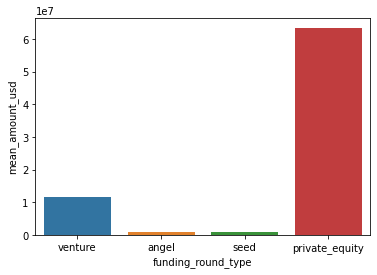

In [275]:
sns.barplot(x = 'funding_round_type', y = 'mean_amount_usd', data = means)

Looking at the above graph, we can say that the ideal fubding type for the client is __venture__.

In [276]:
master_frame = master_frame.query('funding_round_type == ["venture"]') 
master_frame

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,venture,719491.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,8900000.0
...,...,...,...,...,...,...,...
66372,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,venture,12000000.0
66373,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,venture,14219999.0
66374,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,venture,555016.0
66381,/organization/zyrra,Zyrra,E-Commerce,operating,USA,venture,140500.0


In [277]:
master_frame = master_frame.reset_index(drop=True)
master_frame

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0
1,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,venture,719491.0
2,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,20000000.0
3,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,1700000.0
4,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,8900000.0
...,...,...,...,...,...,...,...
39096,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,venture,12000000.0
39097,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,venture,14219999.0
39098,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,venture,555016.0
39099,/organization/zyrra,Zyrra,E-Commerce,operating,USA,venture,140500.0


#### Country Analysis

In [278]:
table = pd.pivot_table(master_frame, values='raised_amount_usd', index=['country_code', 'funding_round_type'], aggfunc=np.sum) 
table

,,raised_amount_usd
country_code,funding_round_type,
ARE,venture,3.426175e+08
AUS,venture,1.248838e+09
BAH,venture,8.900000e+06
BGD,venture,7.002000e+06
BMU,venture,2.888000e+08
BWA,venture,2.250000e+06
CAN,venture,8.747168e+09
CMR,venture,3.595610e+05
CYM,venture,7.958786e+07


In [280]:
table = table.sort_values('raised_amount_usd',axis=0,ascending=False) 
table

,,raised_amount_usd
country_code,funding_round_type,
USA,venture,3.983246e+11
GBR,venture,1.814229e+10
IND,venture,1.392025e+10
CAN,venture,8.747168e+09
ISR,venture,6.484357e+09
SGP,venture,2.739136e+09
IRL,venture,1.648894e+09
AUS,venture,1.248838e+09
MYS,venture,8.750672e+08


In [281]:
top9countries = table[0:9] 

In [282]:
top9countries

,,raised_amount_usd
country_code,funding_round_type,
USA,venture,3.983246e+11
GBR,venture,1.814229e+10
IND,venture,1.392025e+10
CAN,venture,8.747168e+09
ISR,venture,6.484357e+09
SGP,venture,2.739136e+09
IRL,venture,1.648894e+09
AUS,venture,1.248838e+09
MYS,venture,8.750672e+08


In [286]:
top9 = pd.read_csv('top9.csv') 

In [287]:
top9

,country_code,raised_amount_usd
0,USA,3.983246e+11
1,GBR,1.814229e+10
2,IND,1.392025e+10
3,CAN,8.747168e+09
4,ISR,6.484357e+09
5,SGP,2.739136e+09
6,IRL,1.648894e+09
7,AUS,1.248838e+09
8,MYS,8.750672e+08


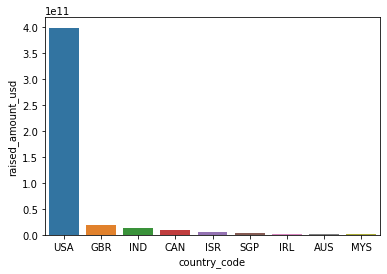

In [288]:
sns.barplot(x = 'country_code', y = 'raised_amount_usd', data = top9) 

Looking at the above graph, we can say that __USA__, __UK__, and __India__ are the top three countries to invest in.

#### Mapping

In [289]:
master_frame['category_list'] = master_frame.category_list.apply(lambda x: pd.Series(str(x).split("|"))) 

In [290]:
master_frame

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0
1,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,venture,719491.0
2,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,20000000.0
3,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,1700000.0
4,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,8900000.0
...,...,...,...,...,...,...,...
39096,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,venture,12000000.0
39097,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,venture,14219999.0
39098,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,venture,555016.0
39099,/organization/zyrra,Zyrra,E-Commerce,operating,USA,venture,140500.0


In [291]:
mapping = pd.read_csv('mapping.csv')
mapping

,category_list,automotive_and_sports,blanks,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [292]:
mapping = mapping.drop([0])
mapping = mapping.reset_index(drop=True)
mapping

,category_list,automotive_and_sports,blanks,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
0,3D,0,0,0,0,0,1,0,0,0
1,3D Printing,0,0,0,0,0,1,0,0,0
2,3D Technology,0,0,0,0,0,1,0,0,0
3,Accounting,0,0,0,0,0,0,0,0,1
4,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
682,Wholesale,0,0,0,0,0,0,0,1,0
683,Wine And Spirits,0,0,0,1,0,0,0,0,0
684,Wireless,0,0,0,1,0,0,0,0,0
685,Women,0,0,0,0,0,0,0,1,0


In [293]:
mapping = mapping.drop('blanks', axis = 1) 
mapping

,category_list,automotive_and_sports,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
0,3D,0,0,0,0,1,0,0,0
1,3D Printing,0,0,0,0,1,0,0,0
2,3D Technology,0,0,0,0,1,0,0,0
3,Accounting,0,0,0,0,0,0,0,1
4,Active Lifestyle,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
682,Wholesale,0,0,0,0,0,0,1,0
683,Wine And Spirits,0,0,1,0,0,0,0,0
684,Wireless,0,0,1,0,0,0,0,0
685,Women,0,0,0,0,0,0,1,0


In [294]:
master_frame = pd.merge(master_frame, mapping, on = 'category_list', how = 'inner') 
master_frame

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,automotive_and_sports,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,Media,operating,GBR,venture,15000000.0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,Media,operating,GBR,venture,5800000.0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,Media,operating,GBR,venture,18000000.0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,venture,5000000.0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36406,/organization/yapta,Yapta,Tracking,operating,USA,venture,5000000.0,0,0,0,0,0,0,1,0
36407,/organization/yapta,Yapta,Tracking,operating,USA,venture,3500000.0,0,0,0,0,0,0,1,0
36408,/organization/yapta,Yapta,Tracking,operating,USA,venture,4220000.0,0,0,0,0,0,0,1,0
36409,/organization/yapta,Yapta,Tracking,operating,USA,venture,2000000.0,0,0,0,0,0,0,1,0


In [295]:
D1 = master_frame.query('country_code == ["USA"]')
D1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,automotive_and_sports,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,venture,5000000.0,0,0,1,0,0,0,0,0
5,/organization/audiosocket,Audiosocket,Media,operating,USA,venture,650000.0,0,0,1,0,0,0,0,0
6,/organization/audiosocket,Audiosocket,Media,operating,USA,venture,750000.0,0,0,1,0,0,0,0,0
7,/organization/audiosocket,Audiosocket,Media,operating,USA,venture,1582300.0,0,0,1,0,0,0,0,0
8,/organization/babble,Babble,Media,acquired,USA,venture,2000000.0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36406,/organization/yapta,Yapta,Tracking,operating,USA,venture,5000000.0,0,0,0,0,0,0,1,0
36407,/organization/yapta,Yapta,Tracking,operating,USA,venture,3500000.0,0,0,0,0,0,0,1,0
36408,/organization/yapta,Yapta,Tracking,operating,USA,venture,4220000.0,0,0,0,0,0,0,1,0
36409,/organization/yapta,Yapta,Tracking,operating,USA,venture,2000000.0,0,0,0,0,0,0,1,0


In [296]:
D1 = D1.reset_index(drop=True)
D1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,automotive_and_sports,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
0,/organization/all-def-digital,All Def Digital,Media,operating,USA,venture,5000000.0,0,0,1,0,0,0,0,0
1,/organization/audiosocket,Audiosocket,Media,operating,USA,venture,650000.0,0,0,1,0,0,0,0,0
2,/organization/audiosocket,Audiosocket,Media,operating,USA,venture,750000.0,0,0,1,0,0,0,0,0
3,/organization/audiosocket,Audiosocket,Media,operating,USA,venture,1582300.0,0,0,1,0,0,0,0,0
4,/organization/babble,Babble,Media,acquired,USA,venture,2000000.0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31282,/organization/yapta,Yapta,Tracking,operating,USA,venture,5000000.0,0,0,0,0,0,0,1,0
31283,/organization/yapta,Yapta,Tracking,operating,USA,venture,3500000.0,0,0,0,0,0,0,1,0
31284,/organization/yapta,Yapta,Tracking,operating,USA,venture,4220000.0,0,0,0,0,0,0,1,0
31285,/organization/yapta,Yapta,Tracking,operating,USA,venture,2000000.0,0,0,0,0,0,0,1,0


In [297]:
D2 = master_frame.query('country_code == ["GBR"]')
D2 = D2.reset_index(drop=True)
D2

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,automotive_and_sports,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
0,/organization/90min,90min,Media,operating,GBR,venture,15000000.0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,Media,operating,GBR,venture,5800000.0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,Media,operating,GBR,venture,18000000.0,0,0,1,0,0,0,0,0
3,/organization/teepix,Teepix,Media,operating,GBR,venture,1655405.0,0,0,1,0,0,0,0,0
4,/organization/abcam,Abcam,Biotechnology,operating,GBR,venture,1800000.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,/organization/skin-analytics,Skin Analytics,mHealth,operating,GBR,venture,100000.0,0,0,0,1,0,0,0,0
1780,/organization/stingray-geophysical,Stingray Geophysical,Gas,operating,GBR,venture,1300000.0,0,1,0,0,0,0,0,0
1781,/organization/stingray-geophysical,Stingray Geophysical,Gas,operating,GBR,venture,4570000.0,0,1,0,0,0,0,0,0
1782,/organization/stingray-geophysical,Stingray Geophysical,Gas,operating,GBR,venture,11460000.0,0,1,0,0,0,0,0,0


In [299]:
D3 = master_frame.query('country_code == ["IND"]')
D3 = D3.reset_index(drop=True)
D3

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,automotive_and_sports,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0,0,0,1,0,0,0,0,0
1,/organization/manas-informatics,Manas Informatic,Media,operating,IND,venture,160000.0,0,0,1,0,0,0,0,0
2,/organization/avesthagen,Avesthagen,Biotechnology,operating,IND,venture,5530000.0,0,1,0,0,0,0,0,0
3,/organization/celon-laboratories,Celon Laboratories,Biotechnology,operating,IND,venture,15800000.0,0,1,0,0,0,0,0,0
4,/organization/centre-for-sight,Centre for Sight,Biotechnology,operating,IND,venture,5000000.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,/organization/revx,RevX,Mobile Advertising,operating,IND,venture,4000000.0,0,0,0,0,0,0,0,1
718,/organization/room-n-house,Room n House,Peer-to-Peer,operating,IND,venture,166396.0,0,0,0,0,0,1,0,0
719,/organization/souqalmal,Souqalmal.com,Price Comparison,operating,IND,venture,1200000.0,0,0,0,0,0,0,0,1
720,/organization/swajal,Swajal,Water Purification,operating,IND,venture,1200000.0,0,1,0,0,0,0,0,0


Total no of investments in country 1:

In [332]:
len(D1.index)

31287

Total no if investments in country 2:

In [333]:
len(D2.index)

1784

Total no of investments in country 3:

In [334]:
len(D3.index)

722

Total amount of investment in country 1:

In [305]:
D1['raised_amount_usd'].sum() 

371038978034.0

Total amount of investment in country 2:

In [306]:
D2['raised_amount_usd'].sum() 

17125001082.0

Total amount of investment in country 3:

In [307]:
D3['raised_amount_usd'].sum() 

13247926235.0

In [324]:
d1asp = D1.query('automotive_and_sports == ["1"]')
len(d1asp.index)

478

In [325]:
d1cs = D1.query('cleantech_or_semiconductors == ["1"]')
len(d1cs.index)

7376

In [326]:
d1ent = D1.query('entertainment == ["1"]') 
len(d1ent.index)

1581

In [327]:
d1hlt = D1.query('health == ["1"]')
len(d1hlt.index)

3076

In [328]:
d1mfg = D1.query('manufacturing == ["1"]')
len(d1mfg.index)

2287

In [329]:
d1nsm = D1.query('news_search_and_messaging == ["1"]')
len(d1nsm.index)

3936

In [330]:
d1oth = D1.query('others == ["1"]')
len(d1oth.index)

7707

In [331]:
d1sfaa = D1.query('social_finance_analytics_advertising == ["1"]')
len(d1sfaa.index)

4846

Top 3 sectors in __country 1__ are __others__, __cleantech or semiconductors__ and __social, finance, analytics, advertising__.

In [323]:
d2asp = D2.query('automotive_and_sports == ["1"]')
len(d2asp.index)

41

In [335]:
d2cs = D2.query('cleantech_or_semiconductors == ["1"]')
len(d2cs.index)

400

In [336]:
d2ent = D2.query('entertainment == ["1"]') 
len(d2ent.index)

121

In [337]:
d2hlt = D2.query('health == ["1"]')
len(d2hlt.index)

111

In [338]:
d2mfg = D2.query('manufacturing == ["1"]')
len(d2mfg.index)

115

In [339]:
d2nsm = D2.query('news_search_and_messaging == ["1"]')
len(d2nsm.index)

222

In [340]:
d2oth = D2.query('others == ["1"]')
len(d2oth.index)

476

In [341]:
d2sfaa = D2.query('social_finance_analytics_advertising == ["1"]')
len(d2sfaa.index)

298

The top 3 sectors in __country 2__ are __others__, __cleantech or semiconductors__, __social, finance, analytics and advertising__.

In [342]:
d3asp = D3.query('automotive_and_sports == ["1"]')
len(d3asp.index)

31

In [343]:
d3cs = D3.query('cleantech_or_semiconductors == ["1"]')
len(d3cs.index)

53

In [345]:
d3ent = D3.query('entertainment == ["1"]') 
len(d3ent.index)

73

In [346]:
d3hlt = D3.query('health == ["1"]')
len(d3hlt.index)

41

In [347]:
d3mfg = D3.query('manufacturing == ["1"]')
len(d3mfg.index)

55

In [350]:
d3nsm = D3.query('news_search_and_messaging == ["1"]')
len(d3nsm.index)

124

In [351]:
d3oth = D3.query('others == ["1"]')
len(d3oth.index)

270

In [352]:
d3sfaa = D3.query('social_finance_analytics_advertising == ["1"]')
len(d3sfaa.index)

75

The top 3 sectors in __country 3__ are __others__, __news, search and messaging__, __social, finance, analytics and advertising__.

In [353]:
d1oth['raised_amount_usd'].max() 

1000000000.0

In [354]:
tc1 = d1oth.query('raised_amount_usd == ["1000000000.0"]') 
tc1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,automotive_and_sports,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
5773,/organization/social-finance,SoFi,Education,operating,USA,venture,1.000000e+09,0,0,0,0,0,0,1,0


SoFi is a company from the __top sector__ in __country 1__ that recieved the highest investment.

In [355]:
d2oth['raised_amount_usd'].max() 

500000000.0

In [356]:
tc2 = d2oth.query('raised_amount_usd == ["500000000.0"]') 
tc2

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,automotive_and_sports,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
1565,/organization/oneweb,OneWeb,Technology,operating,GBR,venture,500000000.0,0,0,0,0,0,0,1,0


OneWeb is a comapny from the __top sector__ in __country 2__ that recieved the highest investment.

In [357]:
d3oth['raised_amount_usd'].max()

1000000000.0

In [358]:
tc3 = d3oth.query('raised_amount_usd == ["1000000000.0"]') 
tc3

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,automotive_and_sports,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
194,/organization/flipkart,Flipkart,E-Commerce,operating,IND,venture,1.000000e+09,0,0,0,0,0,0,1,0


Flipkart is a company from the __top sector__ in __country 3__ that recieved the highest investment.

In [359]:
d1cs['raised_amount_usd'].max()

17600000000.0

In [360]:
sc1 = d1cs.query('raised_amount_usd == ["17600000000.0"]')
sc1

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,automotive_and_sports,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
25025,/organization/freescale,Freescale Semiconductor,Semiconductors,ipo,USA,venture,1.760000e+10,0,1,0,0,0,0,0,0


Freescale Semiconductor is a company in the __second sector__ in __country 1__ that recieved the highest investment.

In [361]:
d2cs['raised_amount_usd'].max()

320000000.0

In [363]:
sc2 = d2cs.query('raised_amount_usd == ["320000000.0"]')
sc2

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,automotive_and_sports,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
127,/organization/immunocore,Immunocore,Biotechnology,operating,GBR,venture,320000000.0,0,1,0,0,0,0,0,0


Immunocore is a company in the __second sector__ in __country 2__ that recieved the highest investment.

In [364]:
d3nsm['raised_amount_usd'].max()

150000000.0

In [365]:
sc3 = d3nsm.query('raised_amount_usd == ["150000000.0"]')
sc3

,company_permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,automotive_and_sports,cleantech_or_semiconductors,entertainment,health,manufacturing,news_search_and_messaging,others,social_finance_analytics_advertising
98,/organization/quikr-india,Quikr,Curated Web,operating,IND,venture,150000000.0,0,0,0,0,0,1,0,0


Quikr is a company in the __second sector__ in __country 3__ that recieved the highest investment.

In [366]:
topsectors = pd.read_csv('topsectors.csv')
topsectors

,country_code,sector_name,no_of_investments
0,USA,others,7707
1,USA,cleantech_or_semiconductors,7636
2,USA,social_finance_analytics_advertising,4846
3,GBR,others,476
4,GBR,cleantech_or_semiconductors,400
5,GBR,social_finance_analytics_advertising,298
6,IND,others,270
7,IND,news_search_and_messaging,124
8,IND,social_finance_analytics_advertising,75


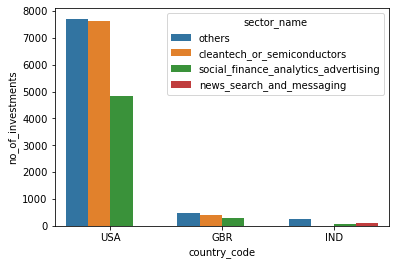

In [368]:
sns.barplot(x = "country_code", y = "no_of_investments", hue = "sector_name", data = topsectors)  

Looking at the above graph, we can say that __Others__ is a sector that has been heavily invested in in all three countries.